<a href="https://colab.research.google.com/github/ali-07700/DSA210/blob/main/Project_code_MachineLearning(Not_Finished).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code is for linear regression for each 5 metrics throguh years.

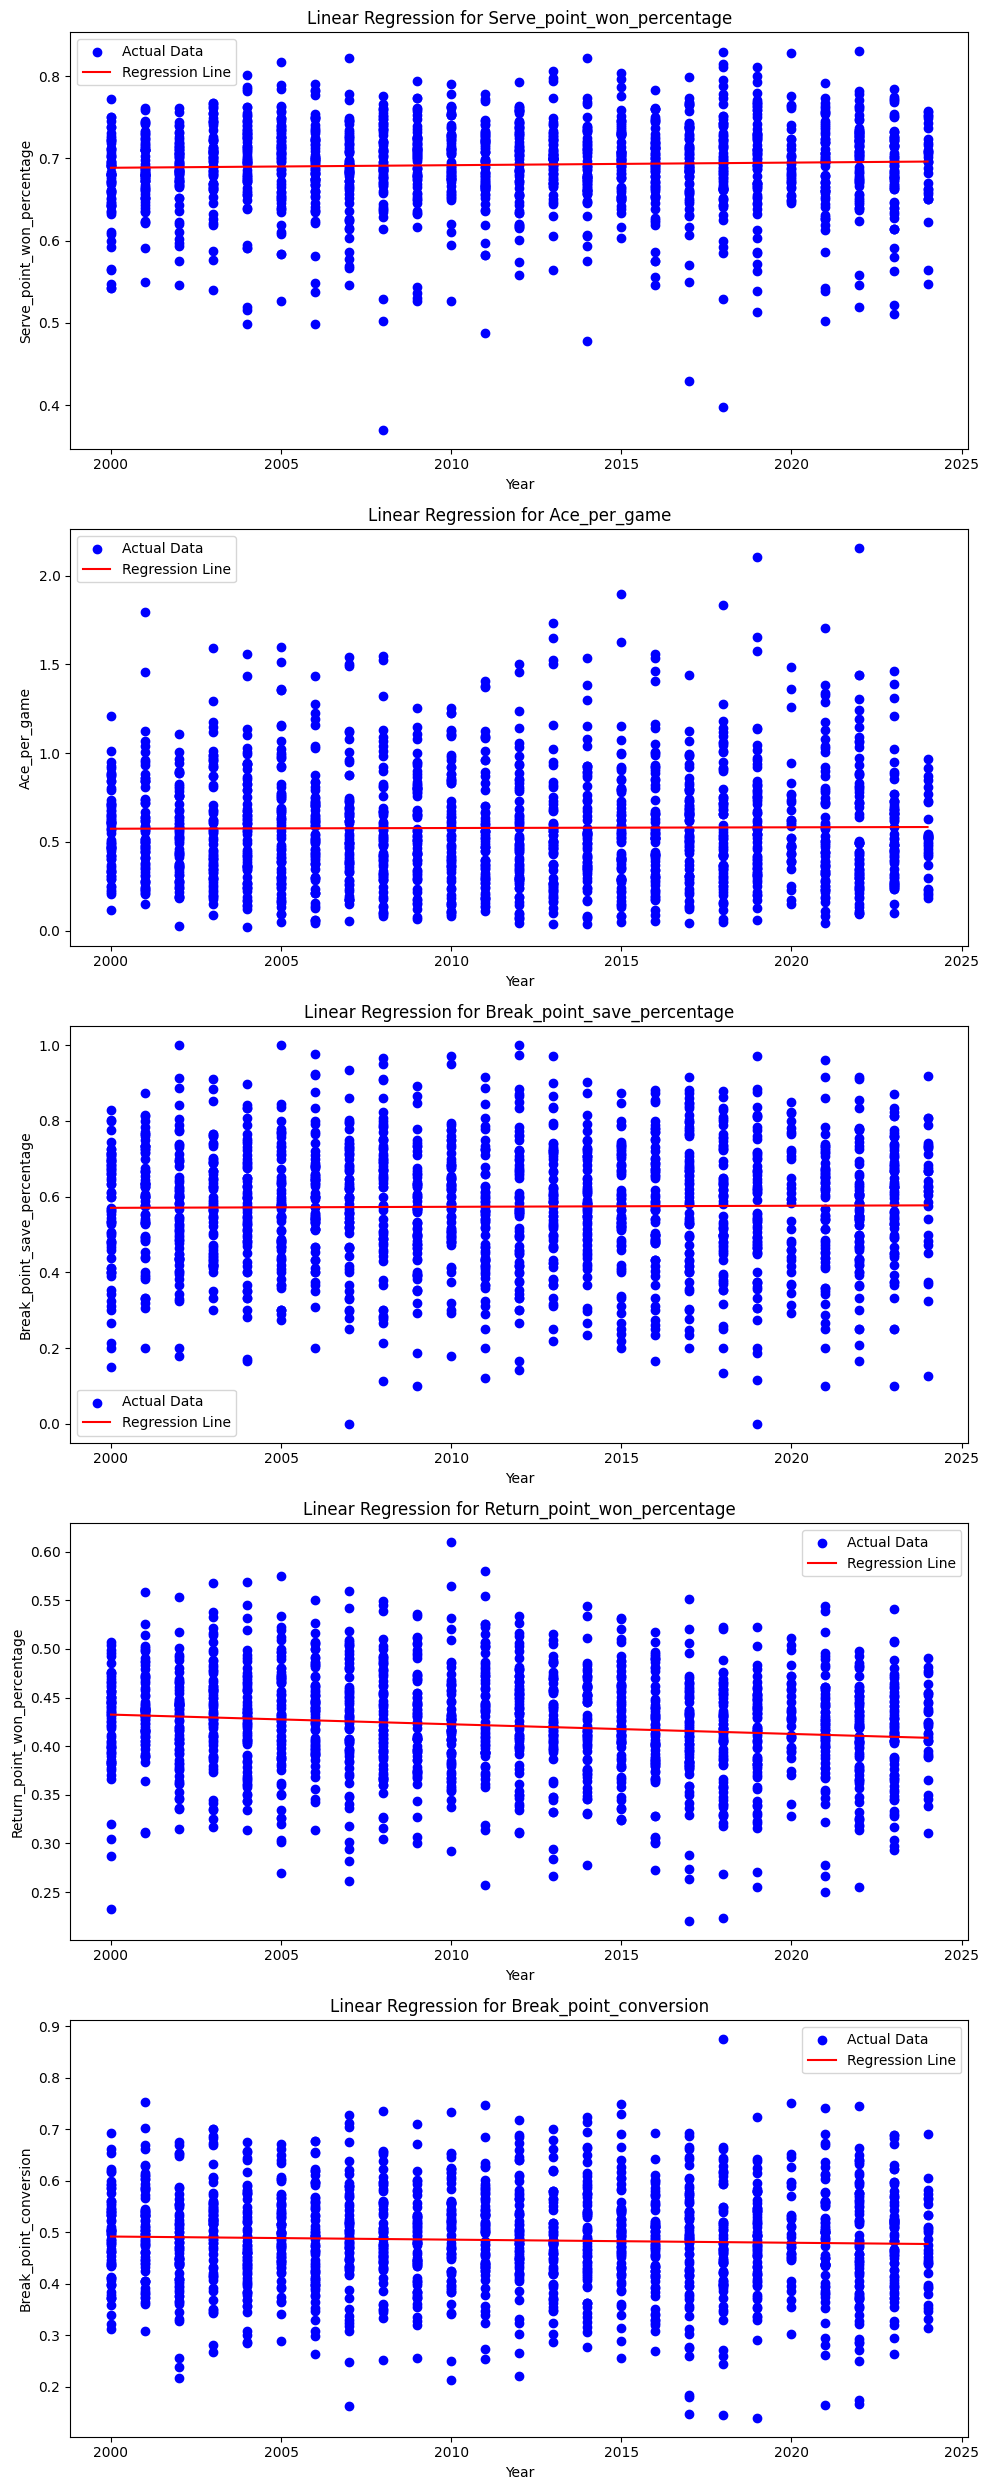

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the data
data = pd.read_csv('updatedData.csv')

# Define the features (X) - years
X = data[['Year']]  # Assuming 'Year' is the column name for years

# Define the target variables (metrics)
metrics = ['Serve_point_won_percentage', 'Ace_per_game', 'Break_point_save_percentage', 'Return_point_won_percentage', 'Break_point_conversion']

# Create a figure and axes for the plots
fig, axes = plt.subplots(len(metrics), 1, figsize=(10, 5 * len(metrics)))  # Adjust figsize as needed

# Loop through each metric and create a linear regression model and plot
for i, metric in enumerate(metrics):
    y = data[[metric]]  # Target variable for the current metric

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the entire range of years
    X_range = pd.DataFrame({'Year': range(data['Year'].min(), data['Year'].max() + 1)})
    y_pred_range = model.predict(X_range)

    # Plot the data and the regression line
    ax = axes[i]  # Get the current axis
    ax.scatter(X, y, color='blue', label='Actual Data')  # Scatter plot of actual data
    ax.plot(X_range['Year'], y_pred_range, color='red', label='Regression Line')  # Line plot of predictions

    ax.set_title(f'Linear Regression for {metric}')
    ax.set_xlabel('Year')
    ax.set_ylabel(metric)
    ax.legend()

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

This code is for linear regression for each tournament level.

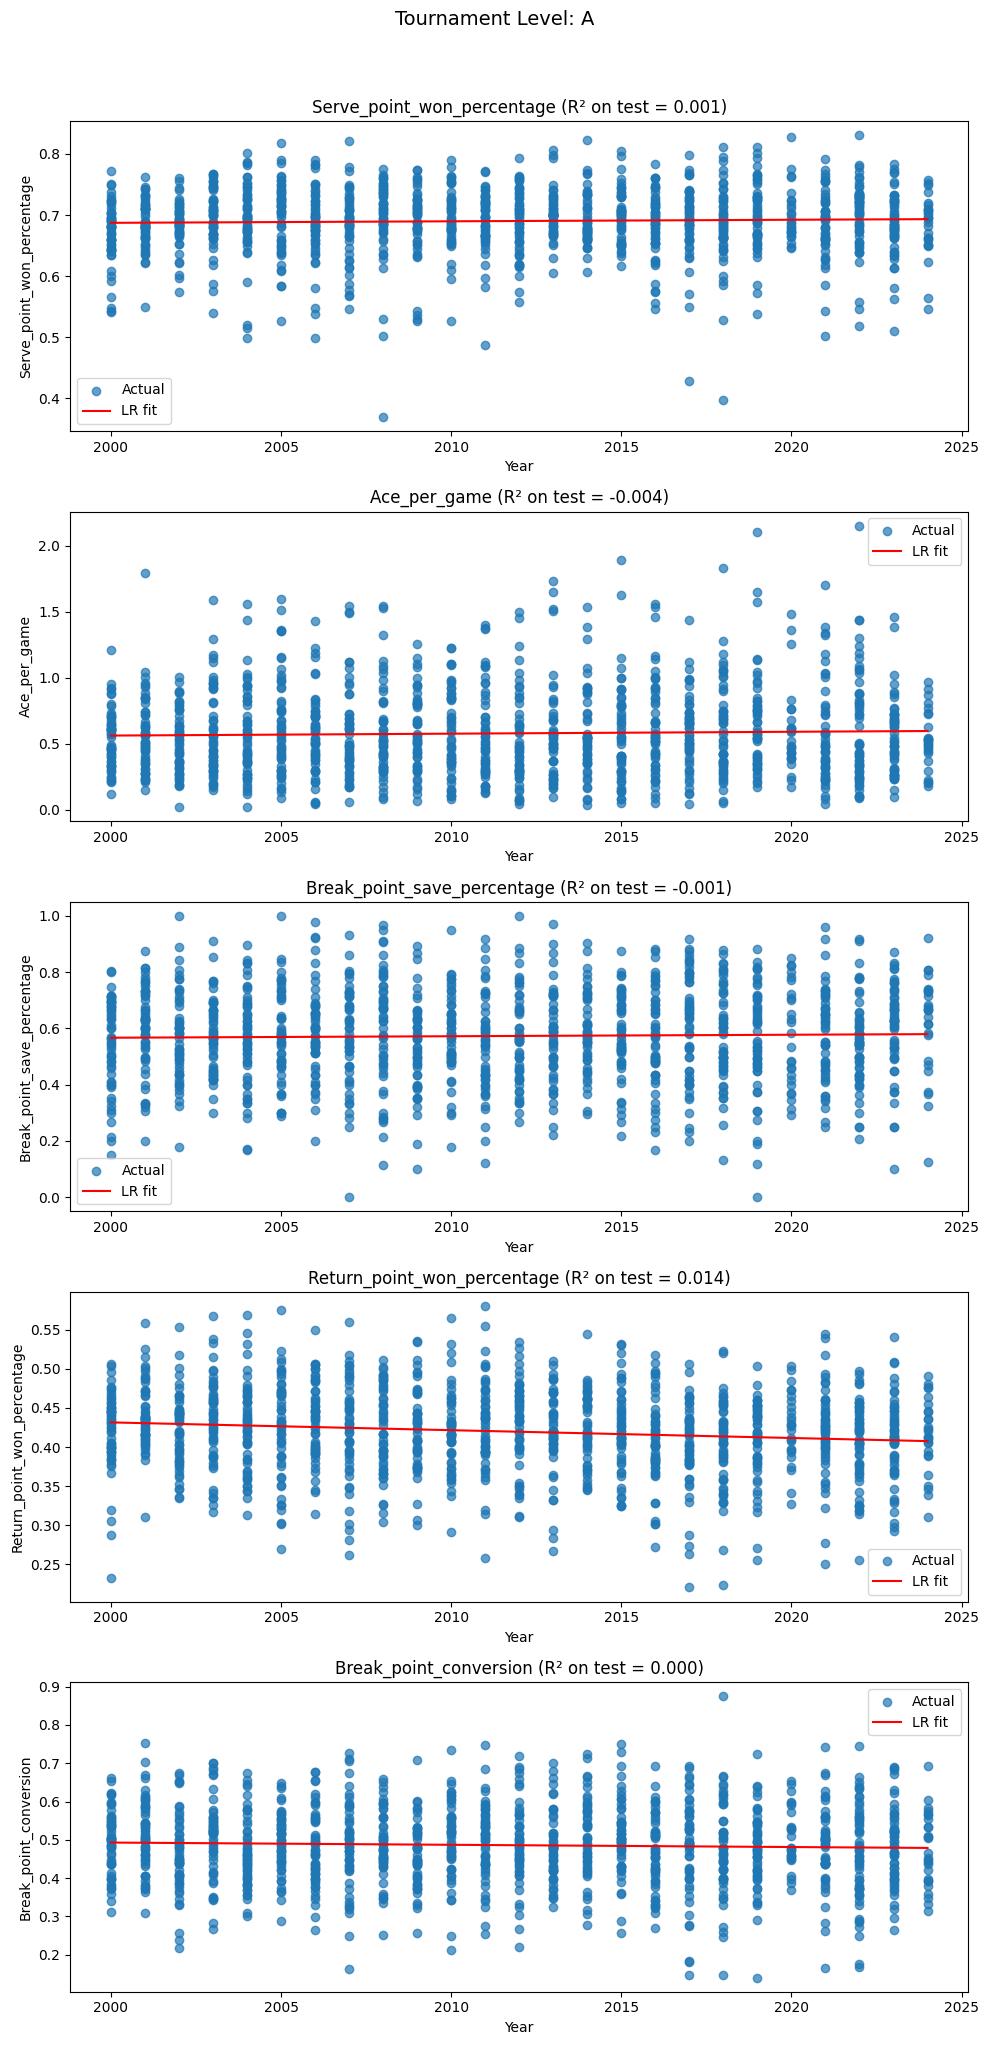

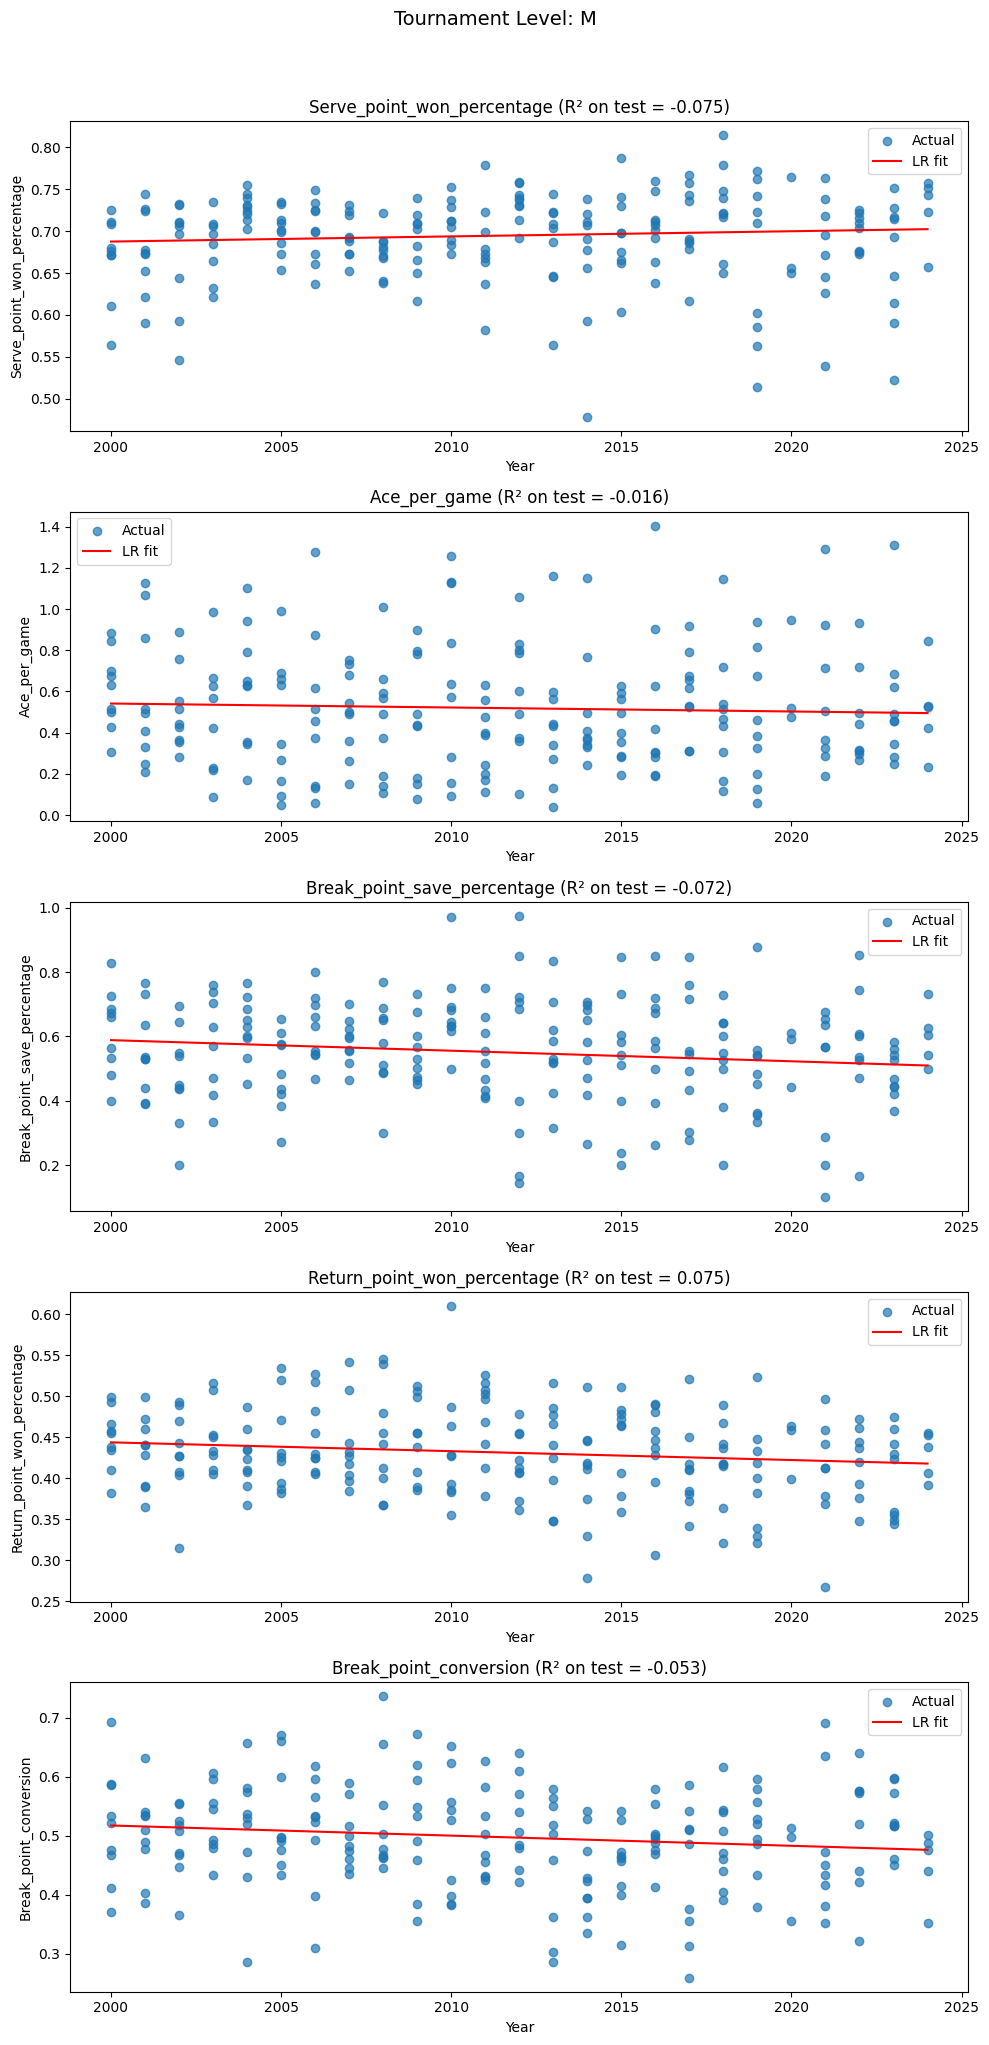

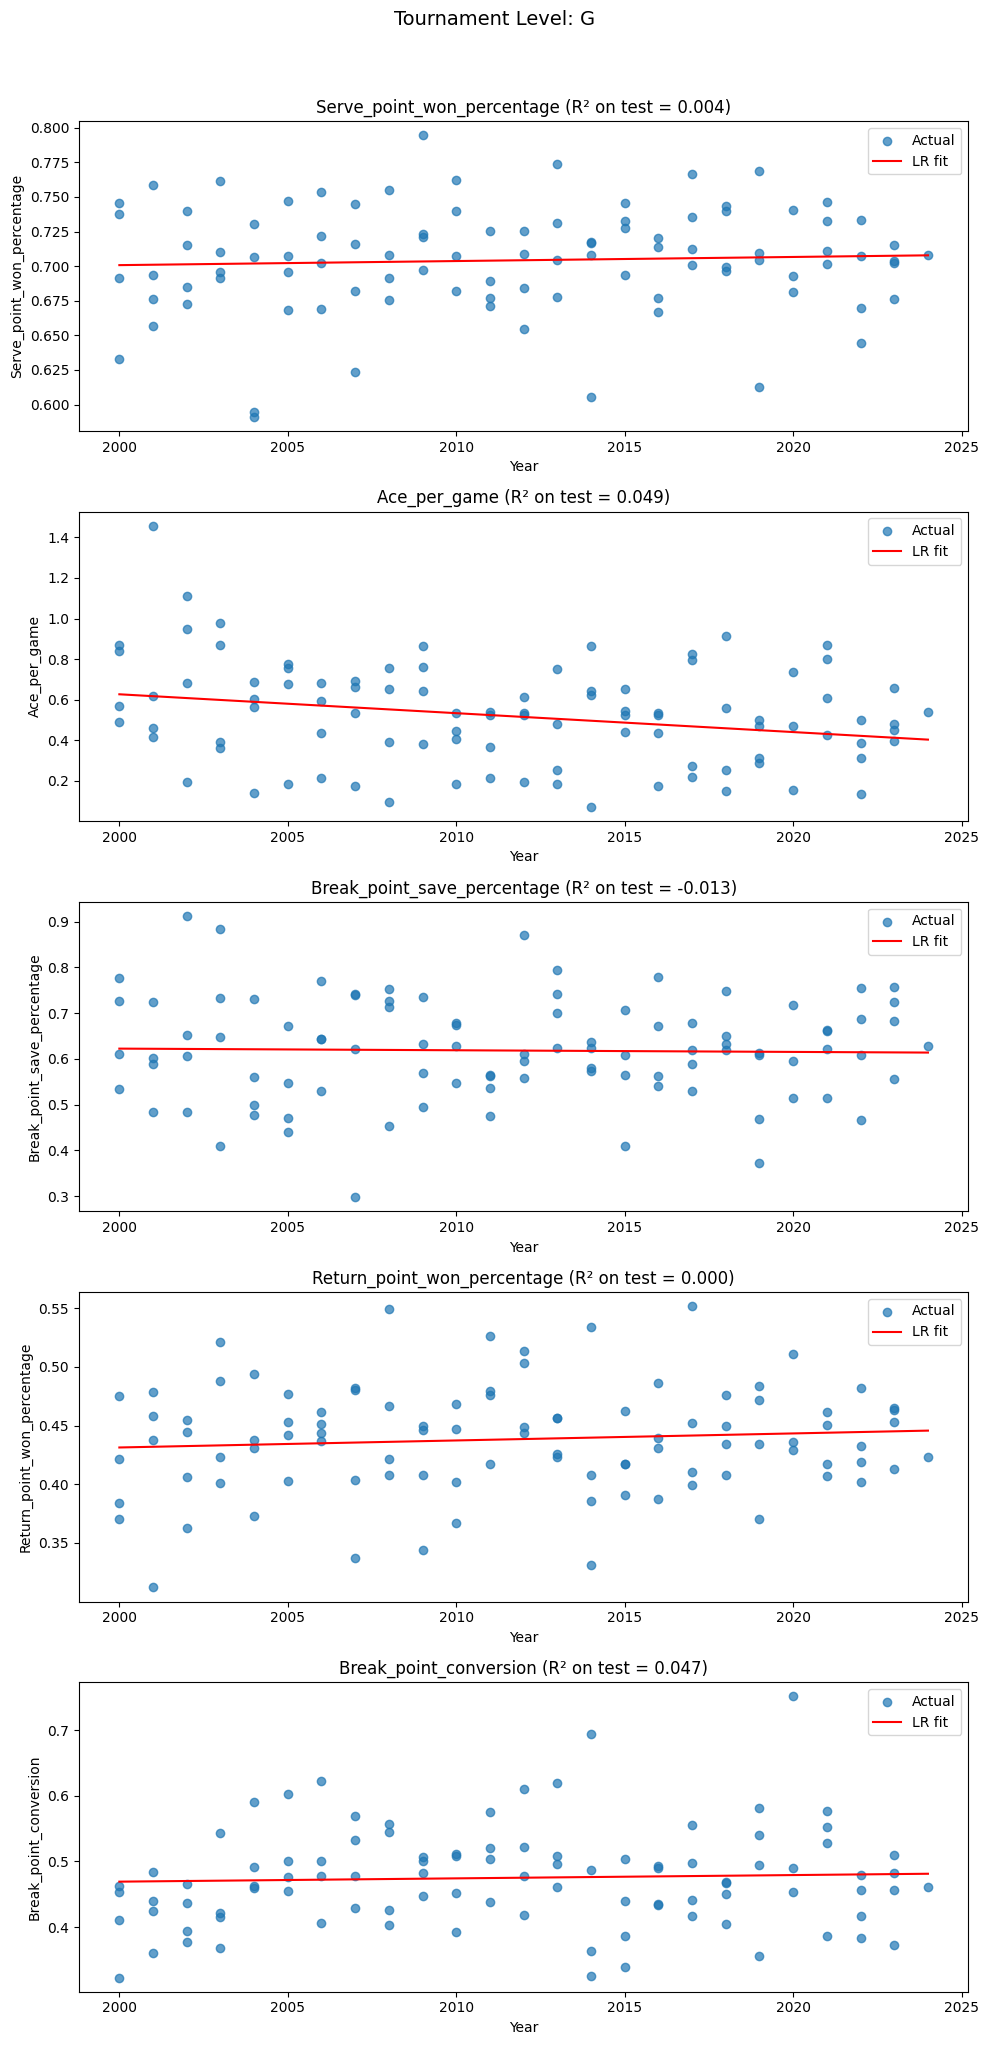

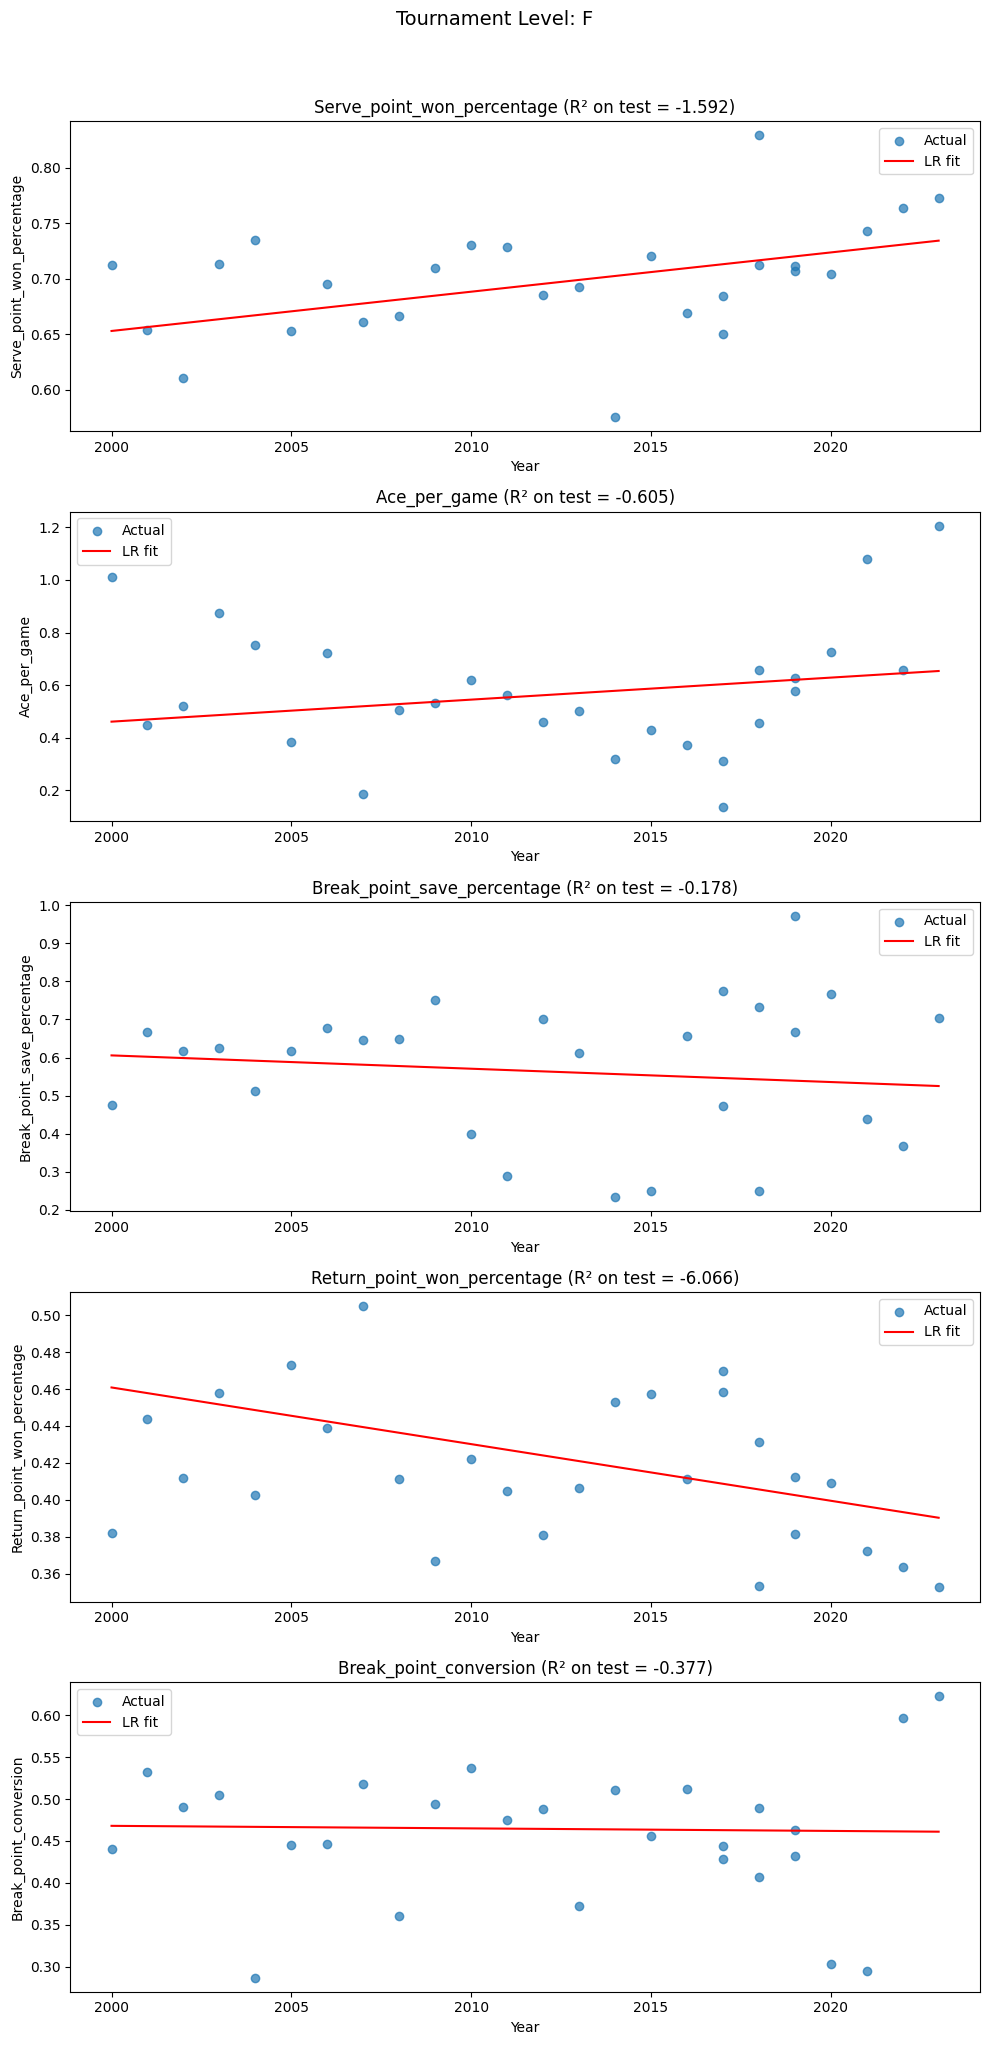

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

CSV_PATH    = "updatedData.csv"
YEAR_COL    = "Year"
LEVEL_COL   = "tourney_level"
LEVELS      = ["A", "M", "G", "F"]
METRICS     = [
    "Serve_point_won_percentage",
    "Ace_per_game",
    "Break_point_save_percentage",
    "Return_point_won_percentage",
    "Break_point_conversion",
]

def plot_for_level(df: pd.DataFrame, level: str):
    subset = df[df[LEVEL_COL] == level]
    if subset.empty:
        print(f"[warn] No data for tourney_level = {level}")
        return

    fig, axes = plt.subplots(len(METRICS), 1, figsize=(10, 4 * len(METRICS)))
    fig.suptitle(f"Tournament Level: {level}", fontsize=14, y=1.02)

    for i, metric in enumerate(METRICS):
        X = subset[[YEAR_COL]]
        y = subset[[metric]]

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )

        model = LinearRegression()
        model.fit(X_train, y_train)
        r2 = model.score(X_test, y_test)

        X_range = pd.DataFrame({
            YEAR_COL: range(subset[YEAR_COL].min(), subset[YEAR_COL].max() + 1)
        })
        y_pred = model.predict(X_range)

        ax = axes[i]
        ax.scatter(X, y, label="Actual", alpha=0.7)
        ax.plot(X_range[YEAR_COL], y_pred, color="red", label="LR fit")
        ax.set_xlabel("Year")
        ax.set_ylabel(metric)
        ax.set_title(f"{metric} (R² on test = {r2:.3f})")
        ax.legend()

    plt.tight_layout()
    plt.show()


# MAIN: run for each level
df = pd.read_csv(CSV_PATH)
for level in LEVELS:
    plot_for_level(df, level)


This code is for each surface.

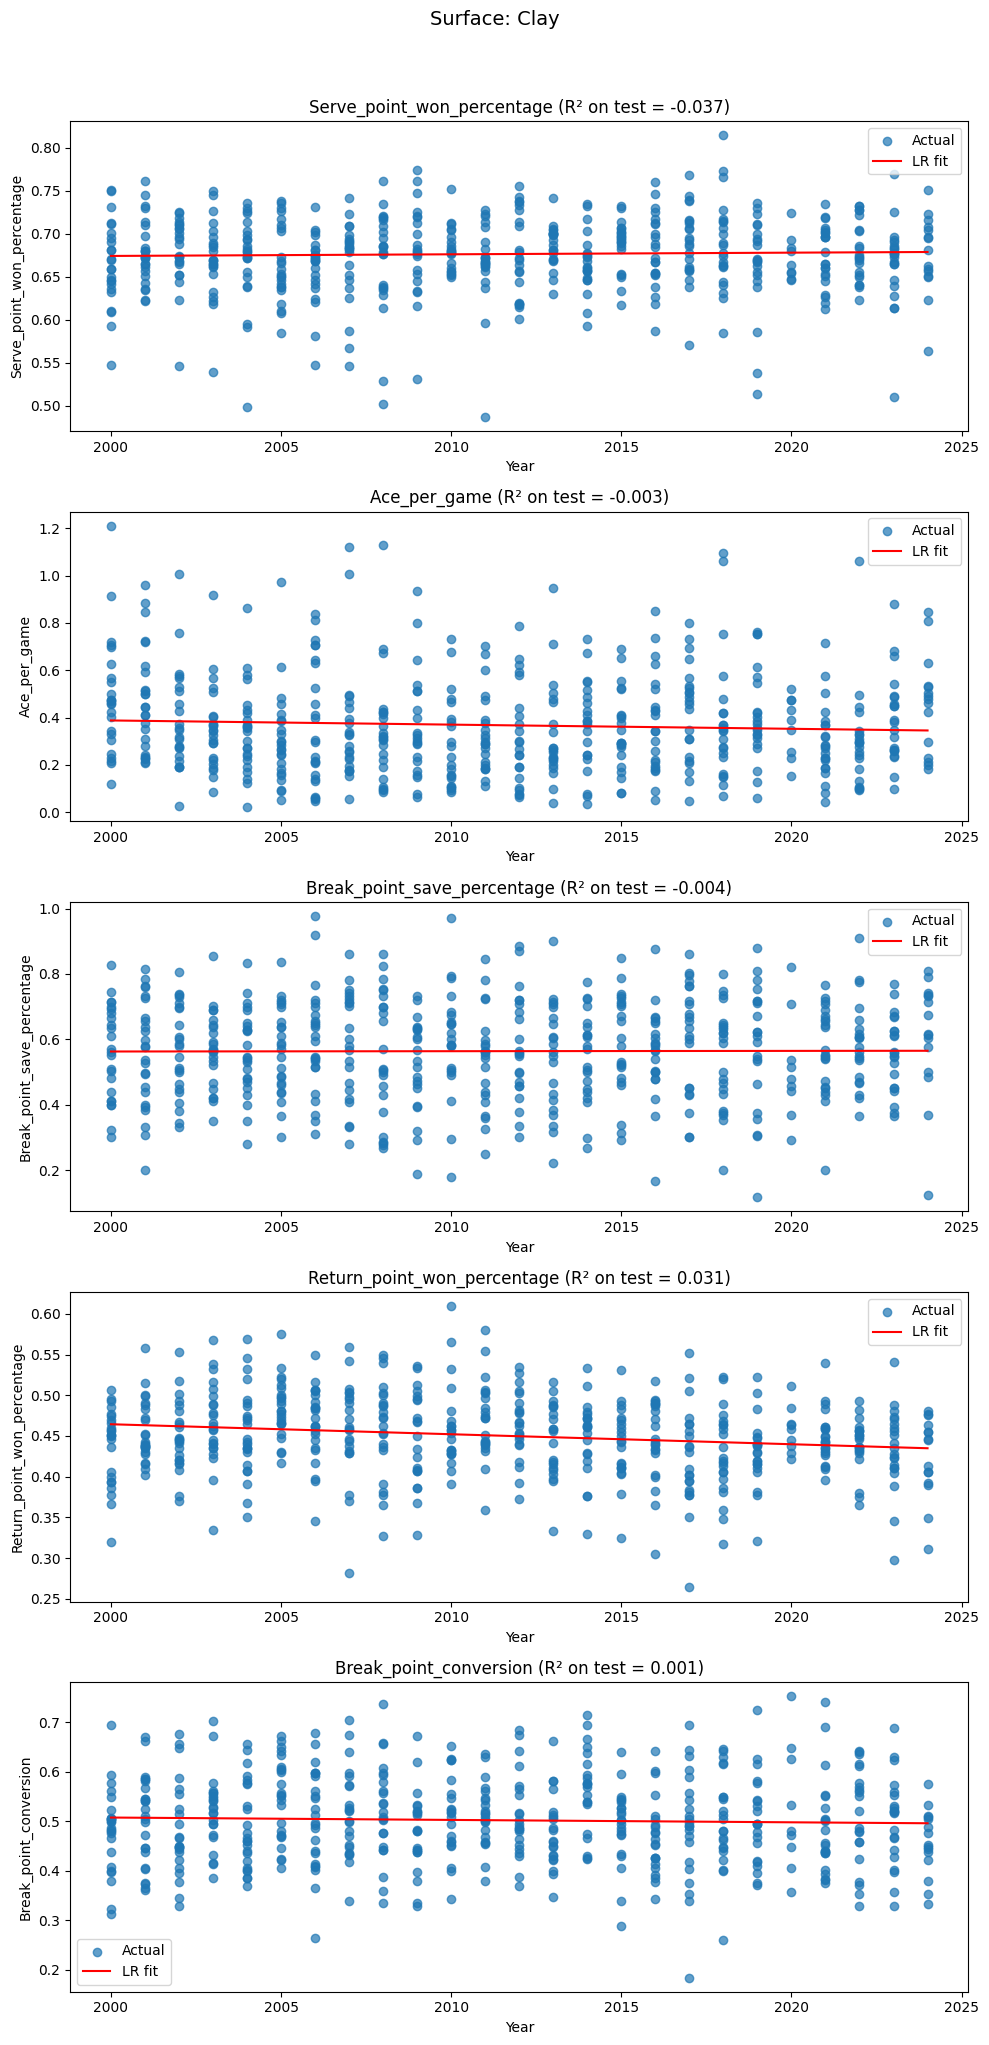

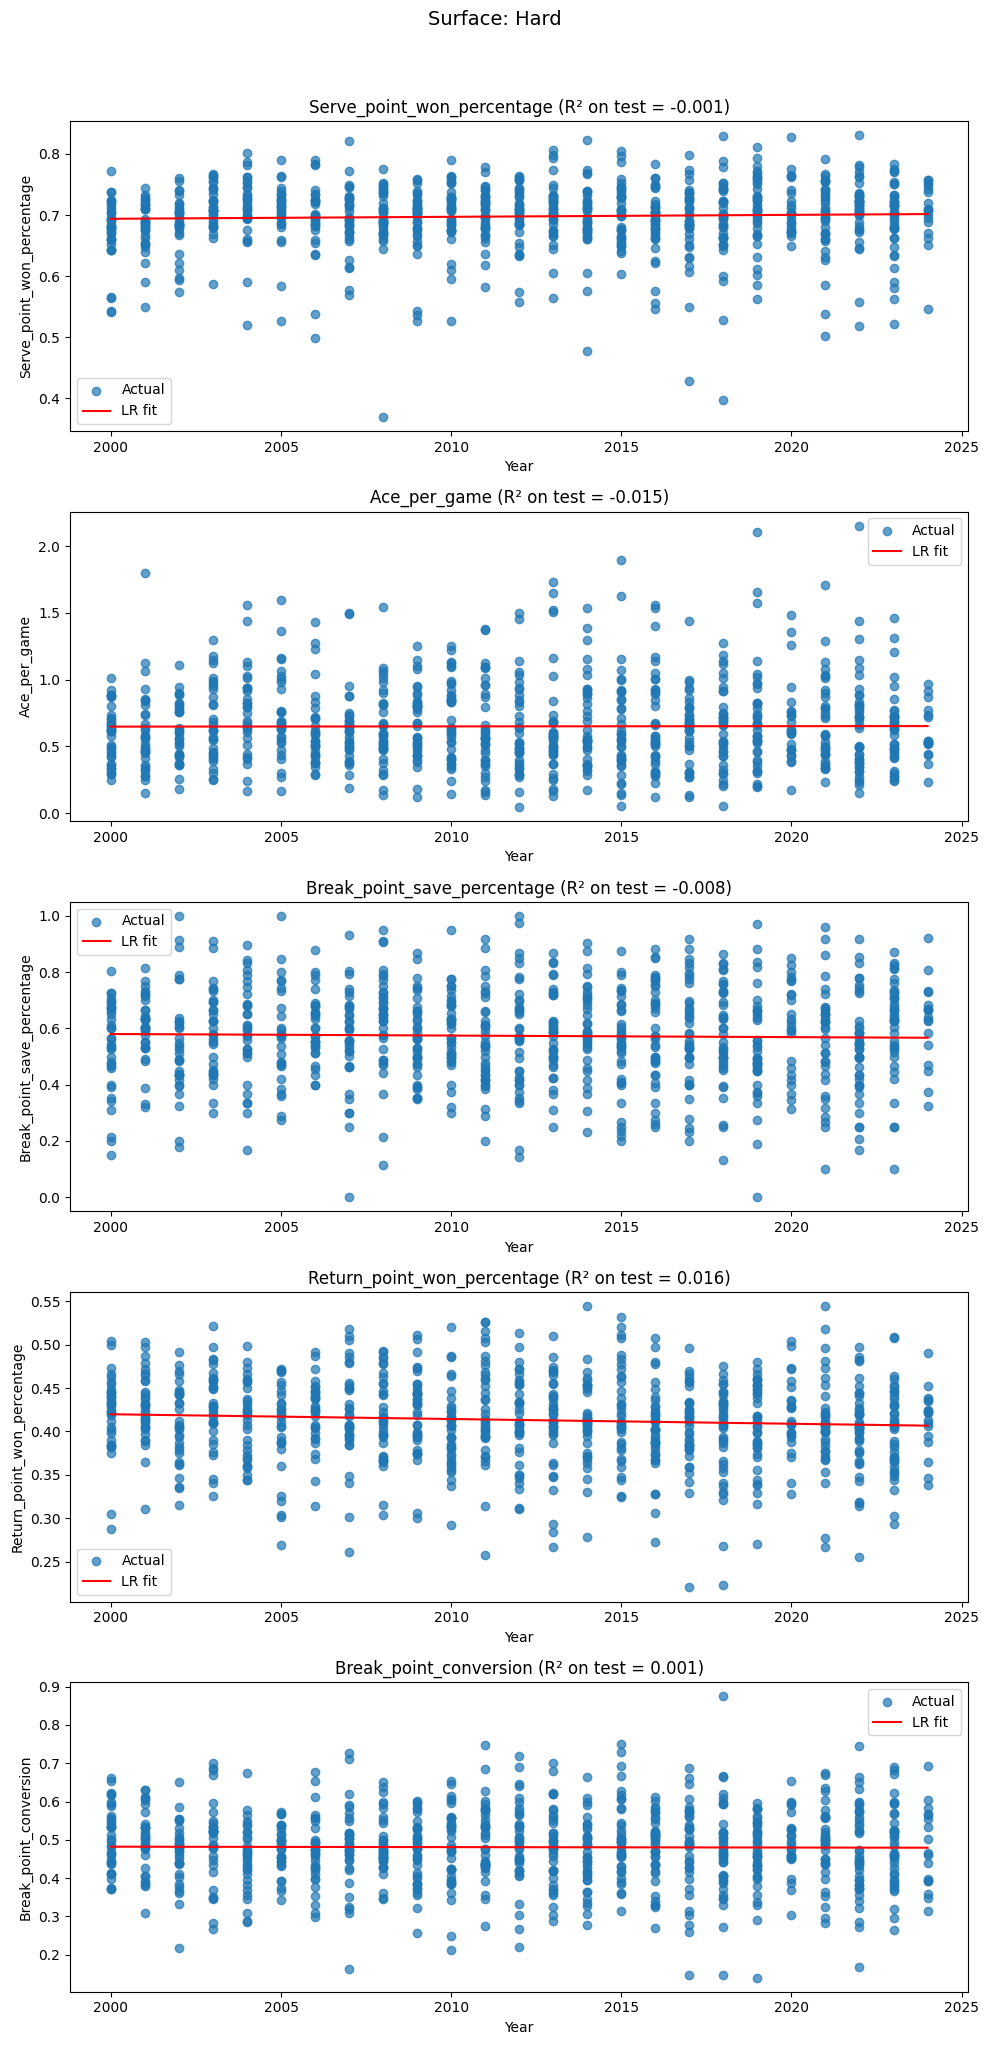

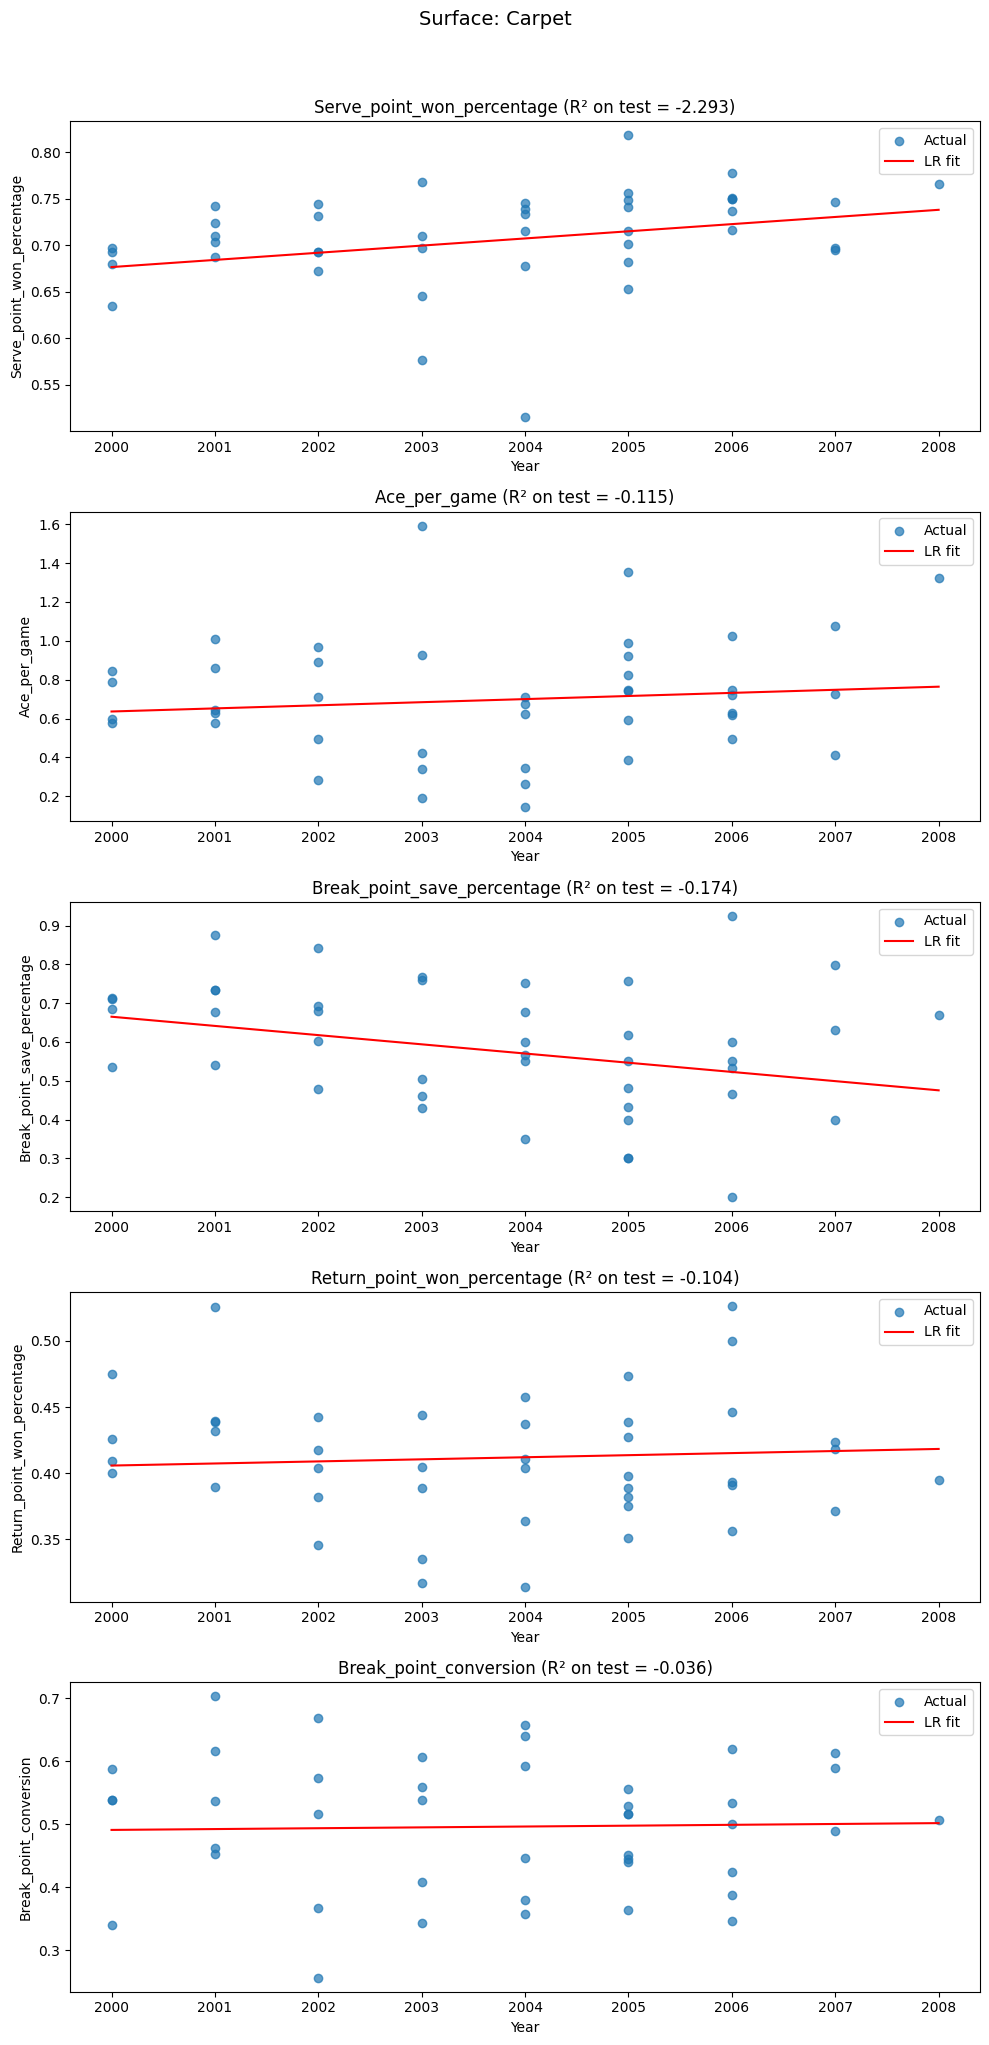

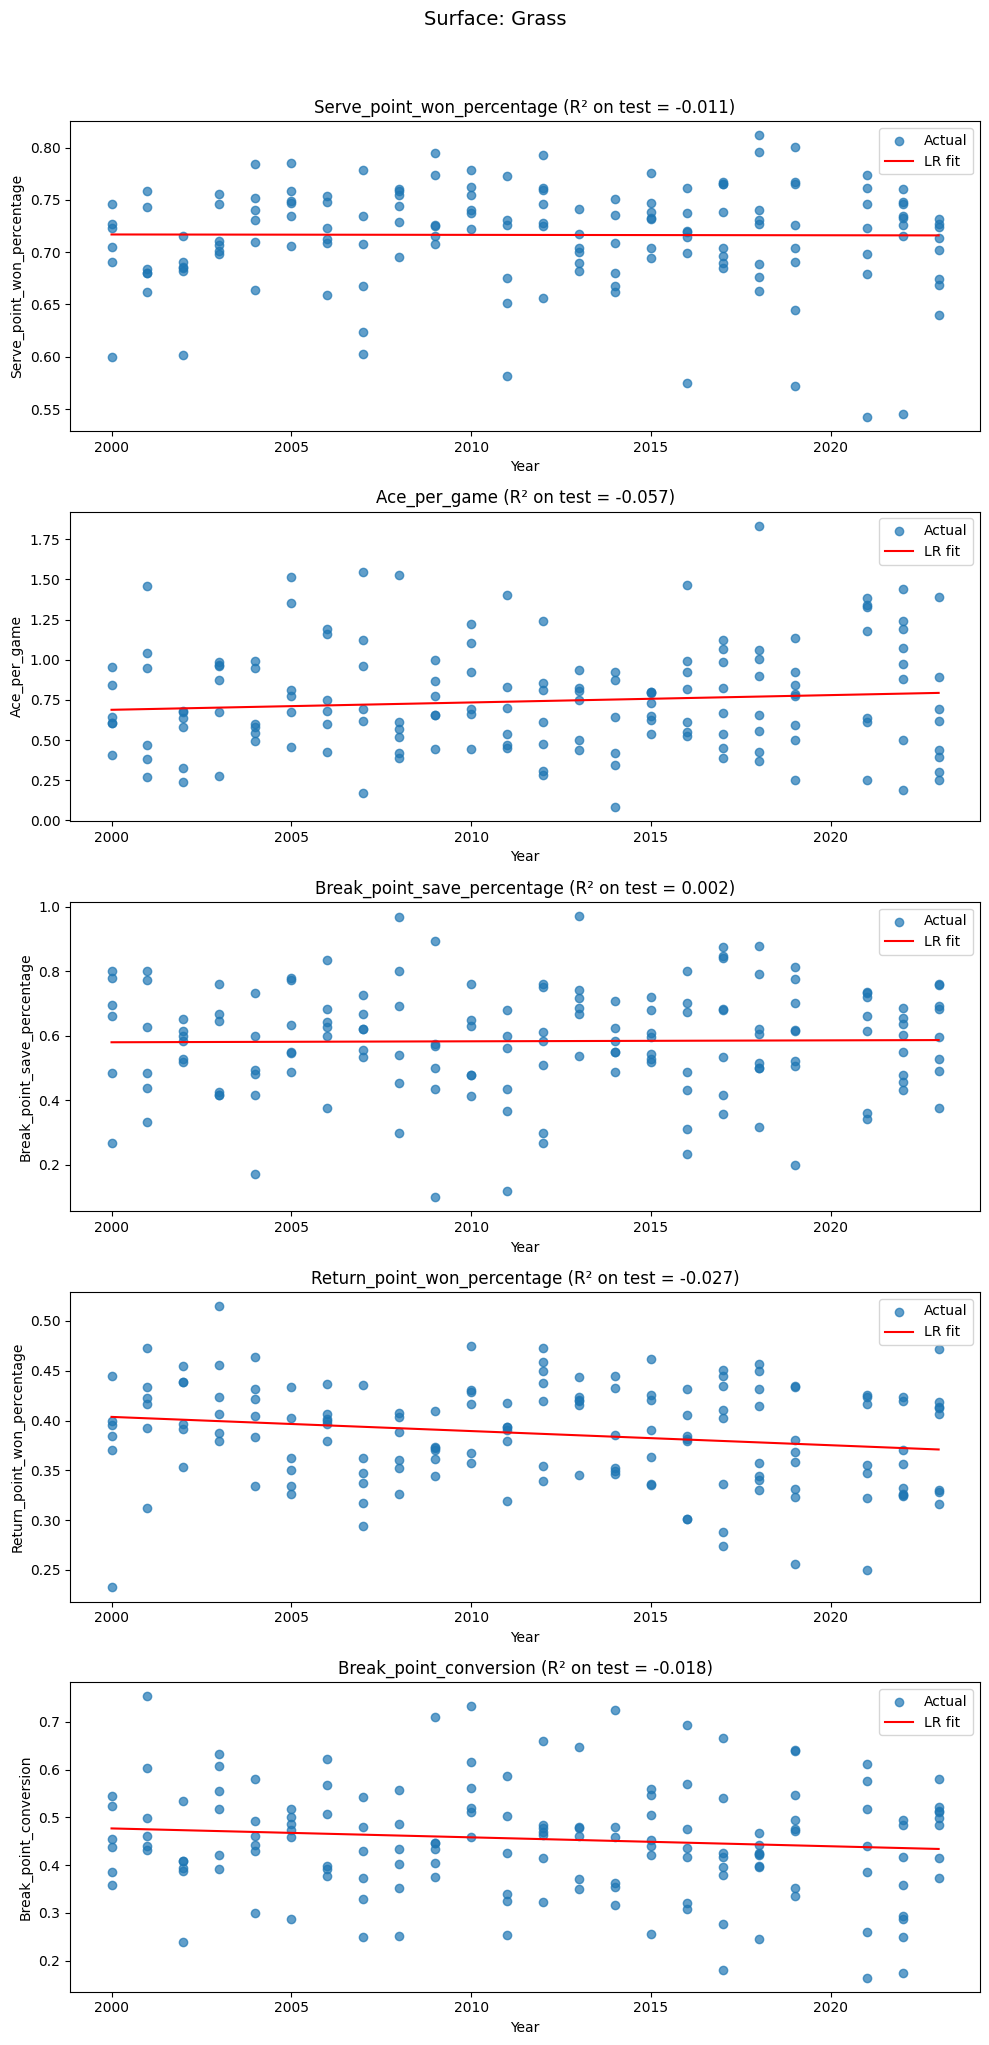

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

CSV_PATH     = "updatedData.csv"
YEAR_COL     = "Year"
SURFACE_COL  = "surface"
SURFACES     = ["Clay", "Hard", "Carpet", "Grass"]
METRICS      = [
    "Serve_point_won_percentage",
    "Ace_per_game",
    "Break_point_save_percentage",
    "Return_point_won_percentage",
    "Break_point_conversion",
]

def plot_for_surface(df: pd.DataFrame, surface: str):
    subset = df[df[SURFACE_COL] == surface]
    if subset.empty:
        print(f"[warn] No data for surface = {surface}")
        return

    fig, axes = plt.subplots(len(METRICS), 1, figsize=(10, 4 * len(METRICS)))
    fig.suptitle(f"Surface: {surface}", fontsize=14, y=1.02)

    for i, metric in enumerate(METRICS):
        X = subset[[YEAR_COL]]
        y = subset[[metric]]

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )

        model = LinearRegression()
        model.fit(X_train, y_train)
        r2 = model.score(X_test, y_test)

        X_range = pd.DataFrame({
            YEAR_COL: range(subset[YEAR_COL].min(), subset[YEAR_COL].max() + 1)
        })
        y_pred = model.predict(X_range)

        ax = axes[i]
        ax.scatter(X, y, label="Actual", alpha=0.7)
        ax.plot(X_range[YEAR_COL], y_pred, color="red", label="LR fit")
        ax.set_xlabel("Year")
        ax.set_ylabel(metric)
        ax.set_title(f"{metric} (R² on test = {r2:.3f})")
        ax.legend()

    plt.tight_layout()
    plt.show()


# MAIN: run for each surface
df = pd.read_csv(CSV_PATH)
for surface in SURFACES:
    plot_for_surface(df, surface)


The lines are showing mean does not change a lot and that is compatible with my results from hypothesis testing, but there is lots of dots (data) which are outliers, so I will try another methods too.

This is decision tree method with XGBoost algorithm for each metrics through years.

Serve_point_won_percentage     | MAE = 0.040 | R² = -0.024


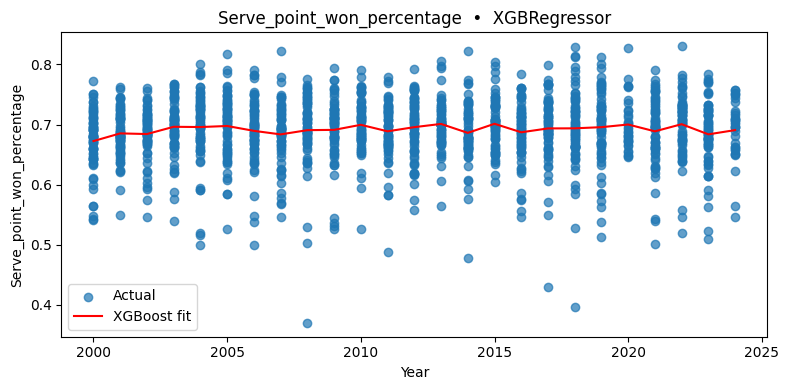

Ace_per_game                   | MAE = 0.260 | R² = -0.004


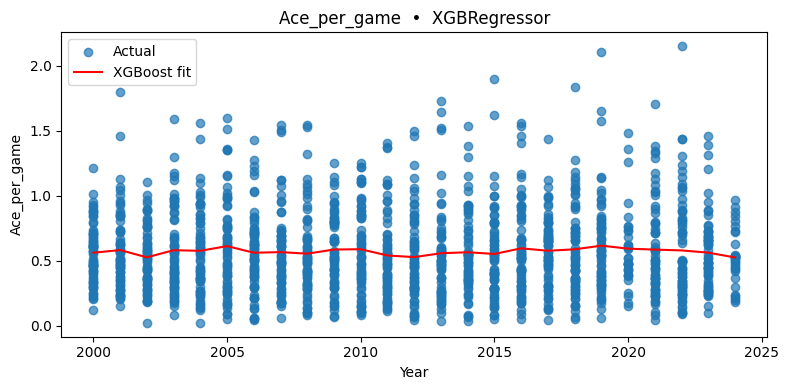

Break_point_save_percentage    | MAE = 0.136 | R² = -0.063


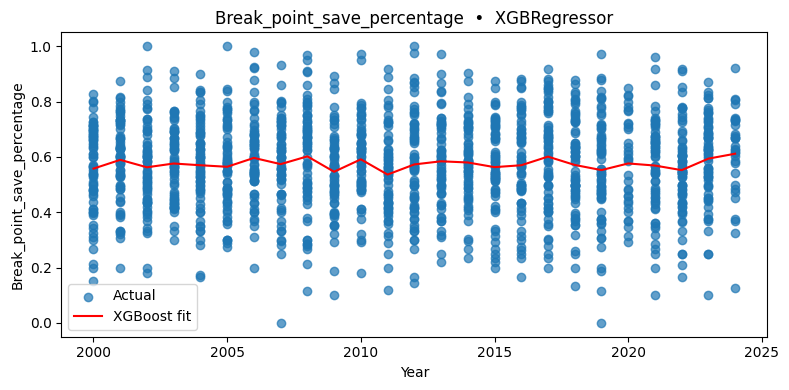

Return_point_won_percentage    | MAE = 0.044 | R² = -0.114


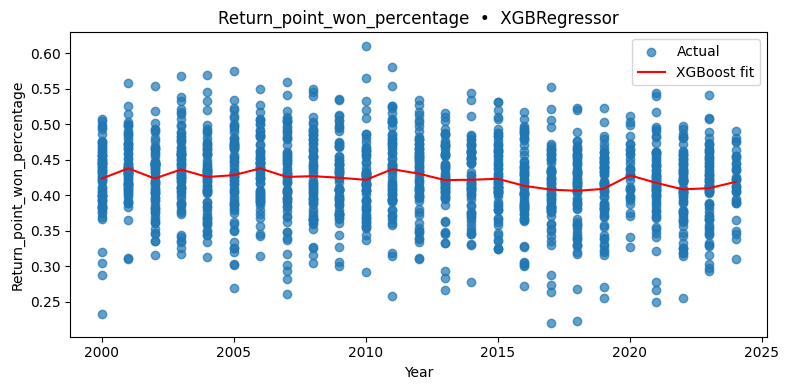

Break_point_conversion         | MAE = 0.080 | R² = -0.067


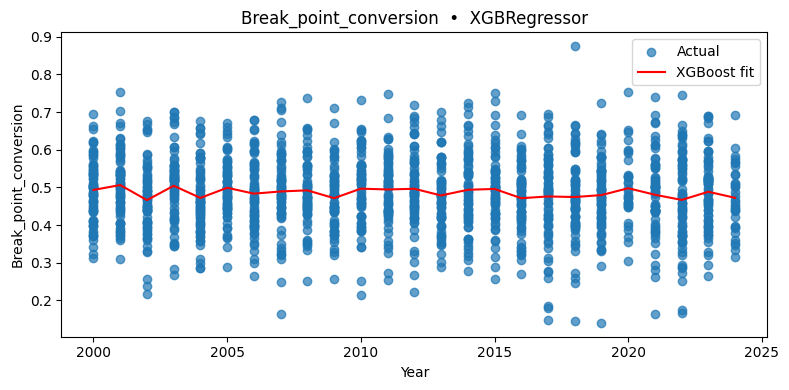

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import XGBRegressor

# -------------------------------------------------
# CONFIG – adjust column names & model hyper‑params
# -------------------------------------------------
CSV_PATH   = "updatedData.csv"
YEAR_COL   = "Year"
METRICS    = [
    "Serve_point_won_percentage",
    "Ace_per_game",
    "Break_point_save_percentage",
    "Return_point_won_percentage",
    "Break_point_conversion",
]

XGB_PARAMS = dict(
    objective="reg:squarederror",
    n_estimators=400,      # trees
    learning_rate=0.05,   # shrinkage
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
)
N_SPLITS = 5              # time‑series CV folds
PLOT_FITS = True          # set False if you only want the numbers
# -------------------------------------------------

df = pd.read_csv("updatedData.csv")

tscv = TimeSeriesSplit(n_splits=N_SPLITS)

for metric in METRICS:
    X = df[[YEAR_COL]].values        # shape (n_samples, 1)
    y = df[metric].values

    mae_scores, r2_scores = [], []

    # ---------- time‑series cross‑validation ----------
    for train_idx, test_idx in tscv.split(X):
        model = XGBRegressor(**XGB_PARAMS)
        model.fit(X[train_idx], y[train_idx])

        y_pred = model.predict(X[test_idx])
        mae_scores.append(mean_absolute_error(y[test_idx], y_pred))
        r2_scores.append(r2_score(y[test_idx], y_pred))

    print(f"{metric:30} | MAE = {sum(mae_scores)/N_SPLITS:.3f}"
          f" | R² = {sum(r2_scores)/N_SPLITS:.3f}")

    # ---------- final fit on the whole series ----------
    model_full = XGBRegressor(**XGB_PARAMS).fit(X, y)

    if PLOT_FITS:
        years_grid = pd.DataFrame({
            YEAR_COL: range(df[YEAR_COL].min(), df[YEAR_COL].max() + 1)
        })
        y_grid_pred = model_full.predict(years_grid)

        plt.figure(figsize=(8, 4))
        plt.scatter(X, y, label="Actual", alpha=0.7)
        plt.plot(years_grid, y_grid_pred, color="red", label="XGBoost fit")
        plt.title(f"{metric}  •  XGBRegressor")
        plt.xlabel("Year")
        plt.ylabel(metric)
        plt.legend()
        plt.tight_layout()
        plt.show()


This is code for each surface.


=== Surface: Clay ===
Serve_point_won_percentage     | MAE = 0.035 | R² = -0.069


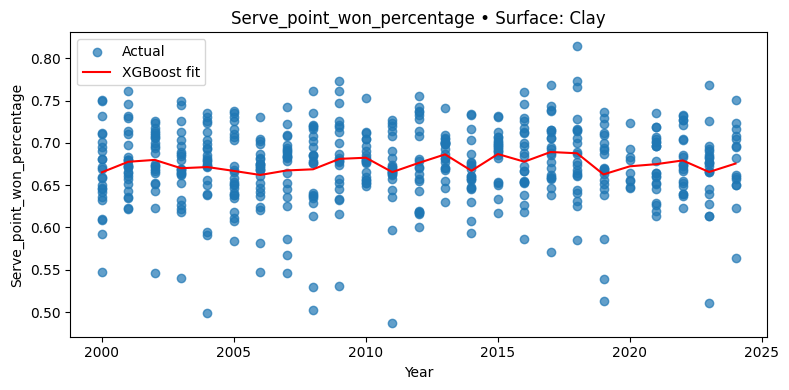

Ace_per_game                   | MAE = 0.166 | R² = -0.053


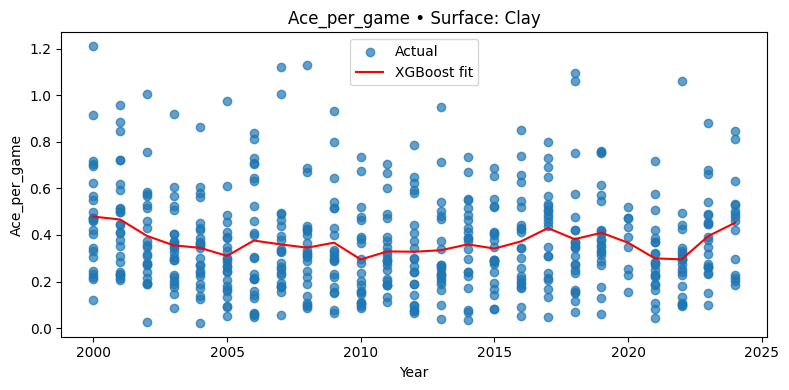

Break_point_save_percentage    | MAE = 0.125 | R² = -0.032


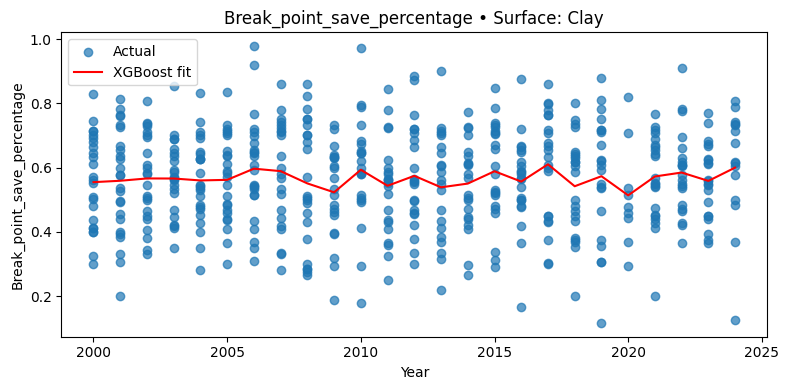

Return_point_won_percentage    | MAE = 0.039 | R² = -0.086


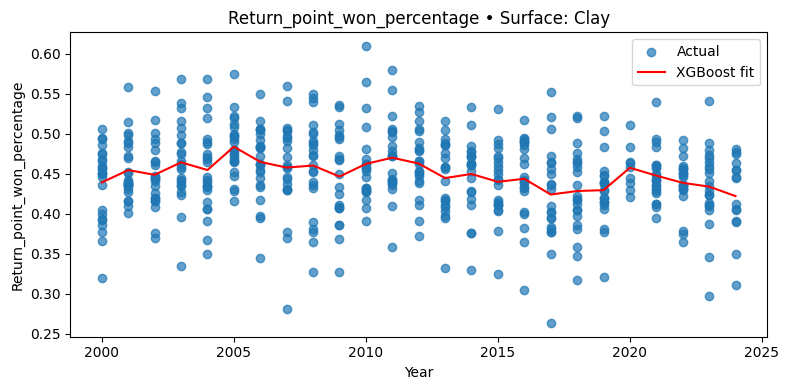

Break_point_conversion         | MAE = 0.072 | R² = -0.008


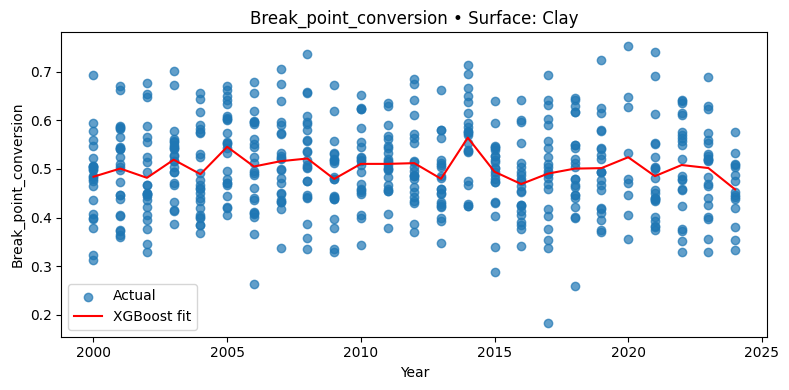


=== Surface: Hard ===
Serve_point_won_percentage     | MAE = 0.041 | R² = -0.112


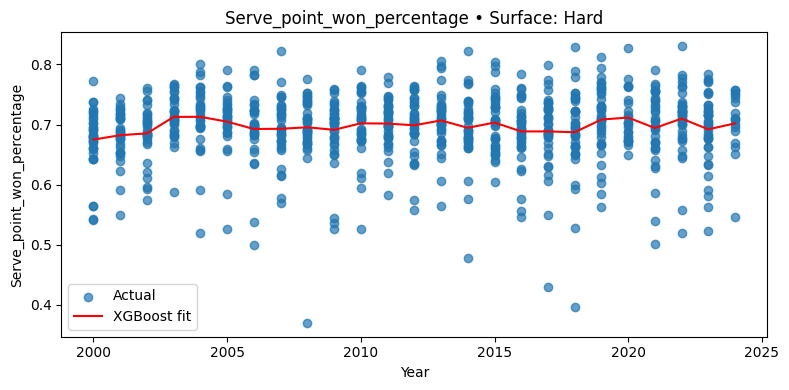

Ace_per_game                   | MAE = 0.265 | R² = -0.101


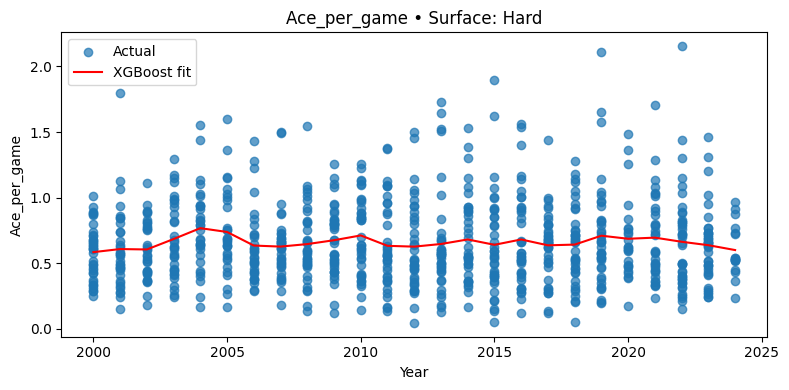

Break_point_save_percentage    | MAE = 0.137 | R² = -0.045


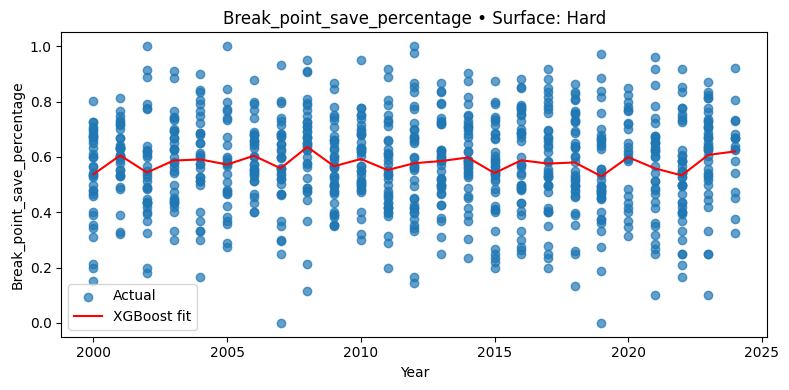

Return_point_won_percentage    | MAE = 0.039 | R² = -0.023


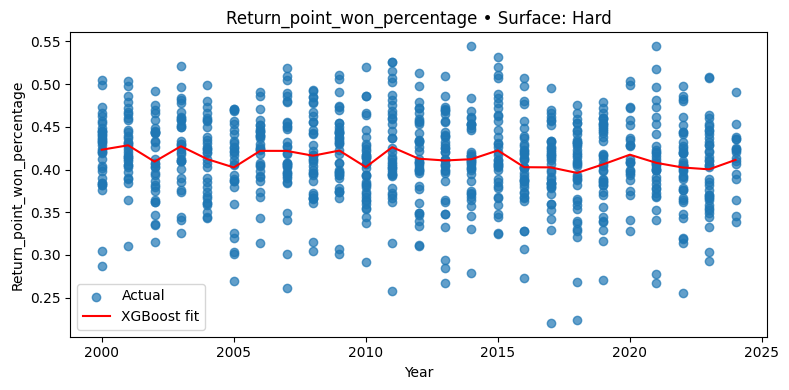

Break_point_conversion         | MAE = 0.077 | R² = -0.016


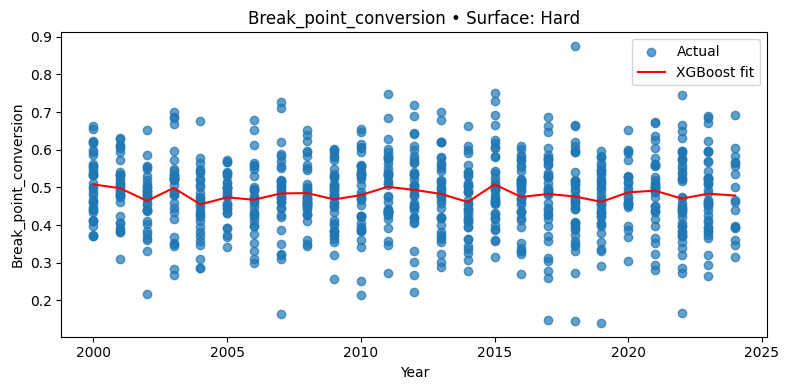


=== Surface: Grass ===
Serve_point_won_percentage     | MAE = 0.038 | R² = -0.221


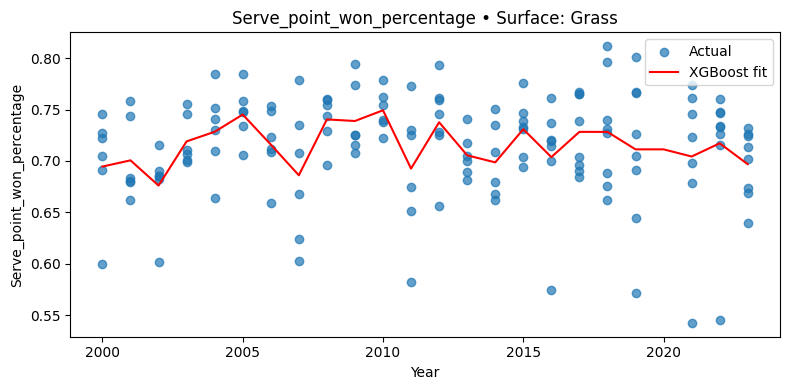

Ace_per_game                   | MAE = 0.282 | R² = -0.186


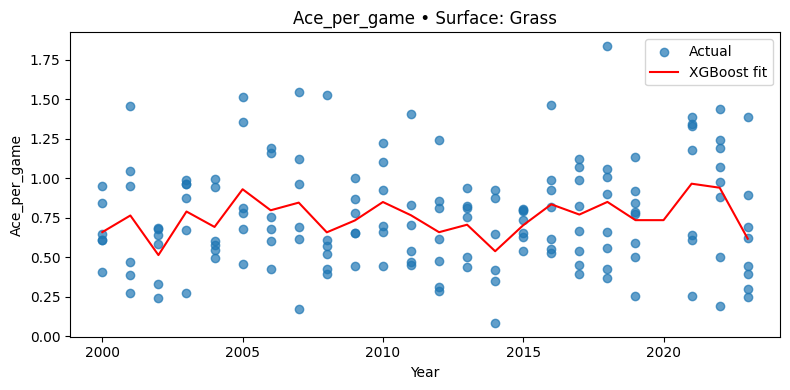

Break_point_save_percentage    | MAE = 0.164 | R² = -0.579


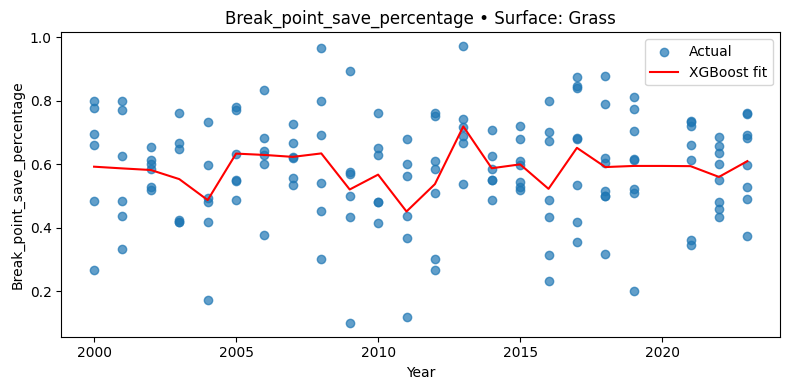

Return_point_won_percentage    | MAE = 0.042 | R² = -0.196


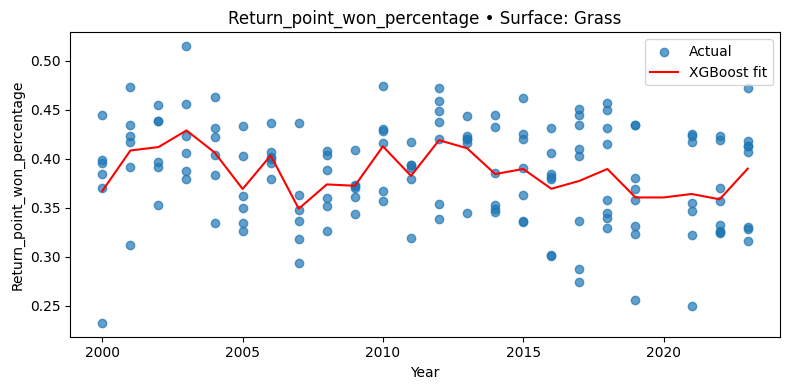

Break_point_conversion         | MAE = 0.090 | R² = -0.078


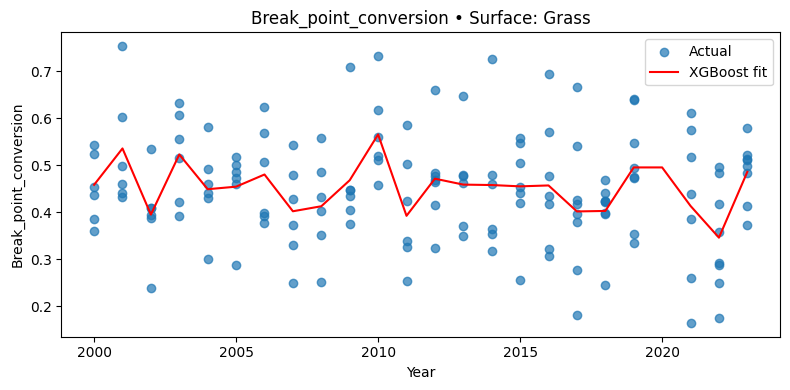


=== Surface: Carpet ===
Serve_point_won_percentage     | MAE = 0.043 | R² = -0.235


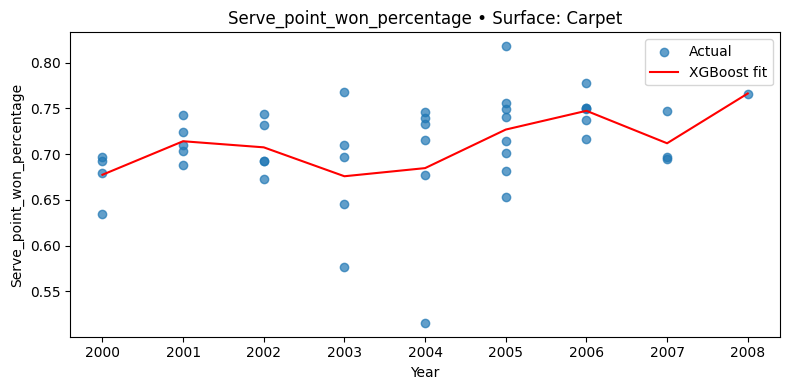

Ace_per_game                   | MAE = 0.307 | R² = -0.734


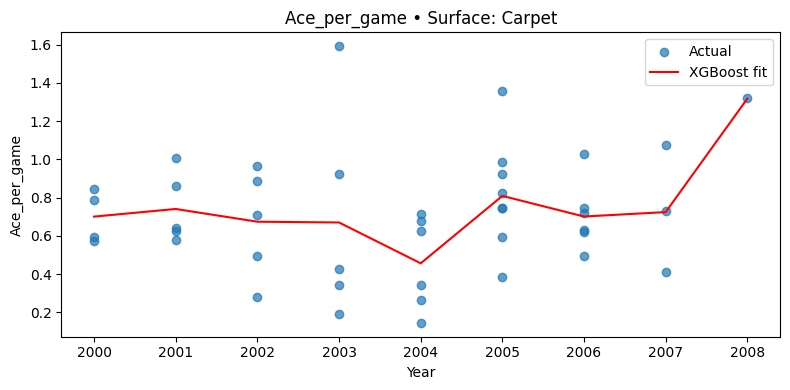

Break_point_save_percentage    | MAE = 0.151 | R² = -0.764


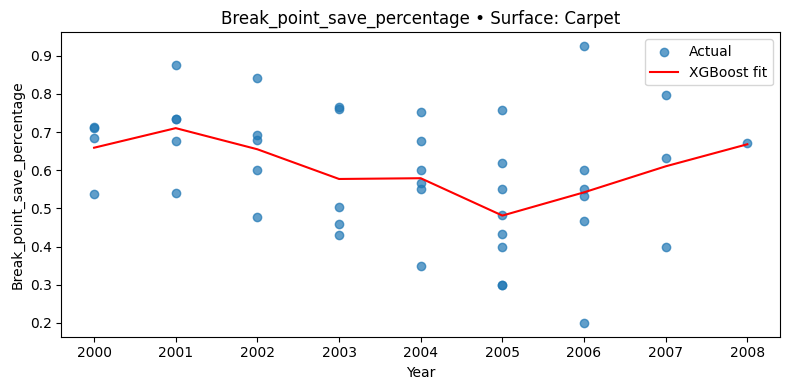

Return_point_won_percentage    | MAE = 0.055 | R² = -2.098


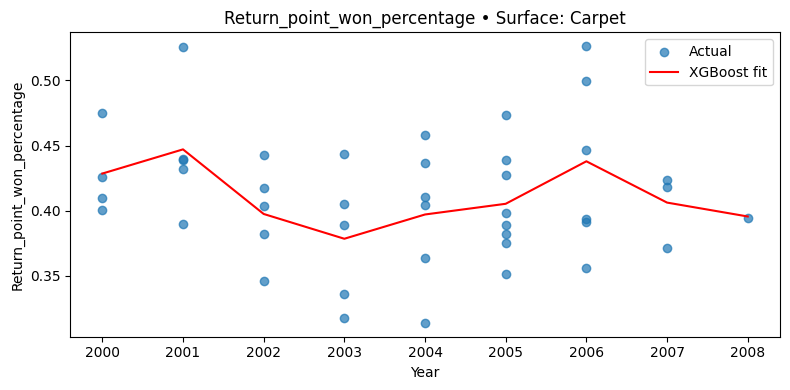

Break_point_conversion         | MAE = 0.094 | R² = -0.216


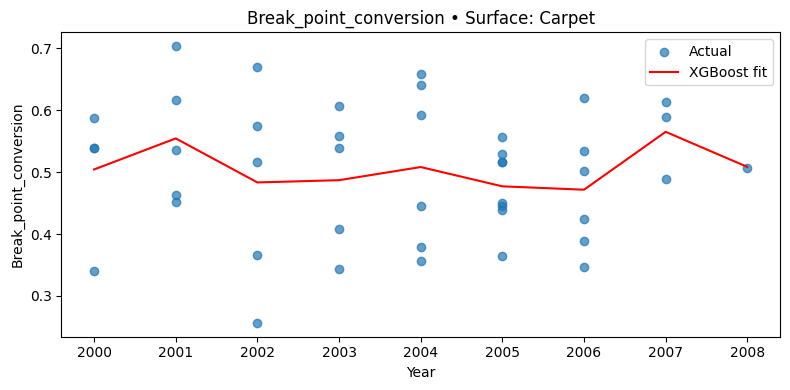

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import XGBRegressor

# CONFIG
CSV_PATH   = "updatedData.csv"
YEAR_COL   = "Year"
SURFACE_COL = "surface"
SURFACES   = ["Clay", "Hard", "Grass", "Carpet"]
METRICS    = [
    "Serve_point_won_percentage",
    "Ace_per_game",
    "Break_point_save_percentage",
    "Return_point_won_percentage",
    "Break_point_conversion",
]
XGB_PARAMS = dict(
    objective="reg:squarederror",
    n_estimators=400,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
)
N_SPLITS = 5
PLOT_FITS = True

# Load data
df = pd.read_csv(CSV_PATH)

for surface in SURFACES:
    df_surface = df[df[SURFACE_COL] == surface]
    if df_surface.empty:
        print(f"[!] No data for surface: {surface}")
        continue

    print(f"\n=== Surface: {surface} ===")

    for metric in METRICS:
        X = df_surface[[YEAR_COL]].values
        y = df_surface[metric].values

        mae_scores, r2_scores = [], []
        tscv = TimeSeriesSplit(n_splits=N_SPLITS)

        for train_idx, test_idx in tscv.split(X):
            model = XGBRegressor(**XGB_PARAMS)
            model.fit(X[train_idx], y[train_idx])
            y_pred = model.predict(X[test_idx])
            mae_scores.append(mean_absolute_error(y[test_idx], y_pred))
            r2_scores.append(r2_score(y[test_idx], y_pred))

        print(f"{metric:30} | MAE = {sum(mae_scores)/N_SPLITS:.3f} | R² = {sum(r2_scores)/N_SPLITS:.3f}")

        model_full = XGBRegressor(**XGB_PARAMS).fit(X, y)

        if PLOT_FITS:
            years_grid = pd.DataFrame({
                YEAR_COL: range(df_surface[YEAR_COL].min(), df_surface[YEAR_COL].max() + 1)
            })
            y_grid_pred = model_full.predict(years_grid)

            plt.figure(figsize=(8, 4))
            plt.scatter(X, y, label="Actual", alpha=0.7)
            plt.plot(years_grid, y_grid_pred, color="red", label="XGBoost fit")
            plt.title(f"{metric} • Surface: {surface}")
            plt.xlabel("Year")
            plt.ylabel(metric)
            plt.legend()
            plt.tight_layout()
            plt.show()


This code is for each tournament level.


=== Tournament Level: A ===
Serve_point_won_percentage     | MAE = 0.042 | R² = -0.082


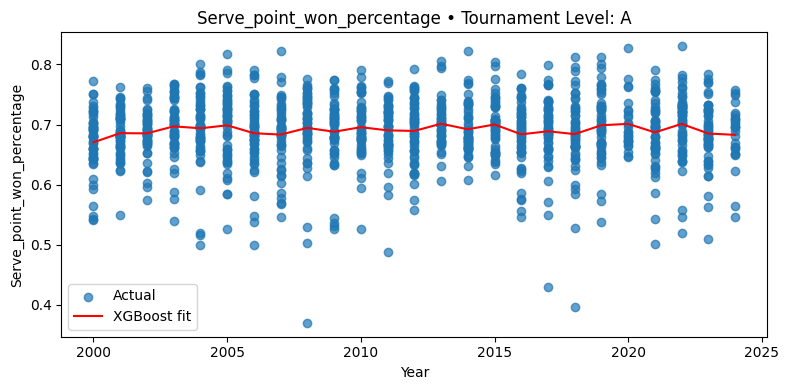

Ace_per_game                   | MAE = 0.286 | R² = -0.079


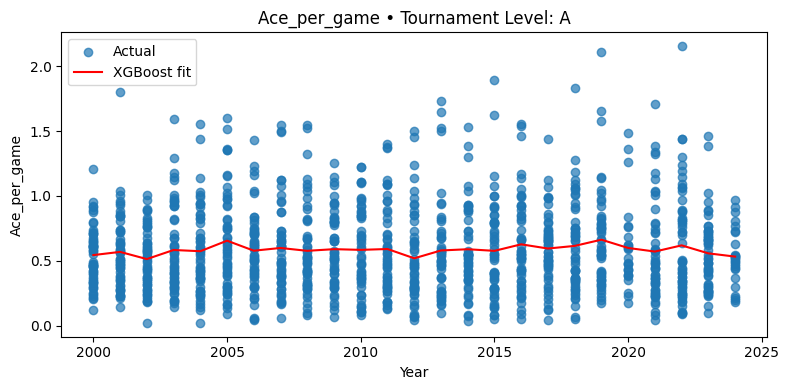

Break_point_save_percentage    | MAE = 0.143 | R² = -0.119


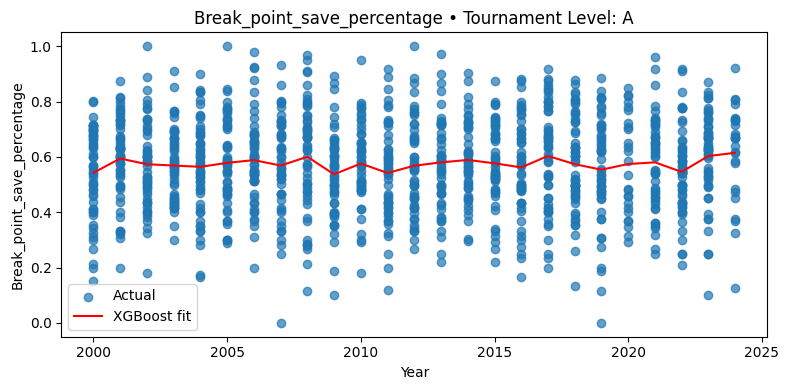

Return_point_won_percentage    | MAE = 0.043 | R² = -0.035


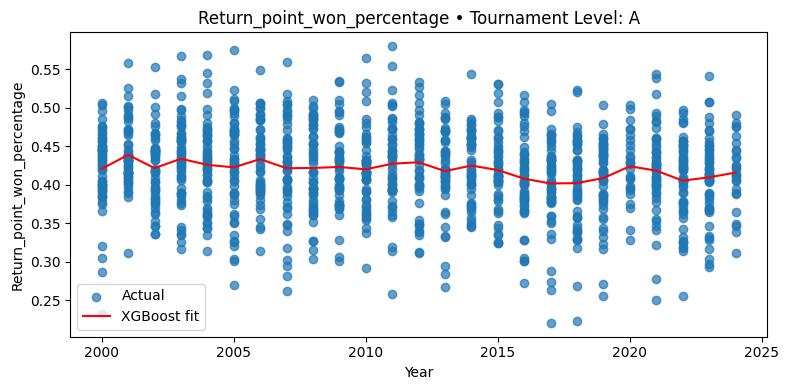

Break_point_conversion         | MAE = 0.083 | R² = -0.083


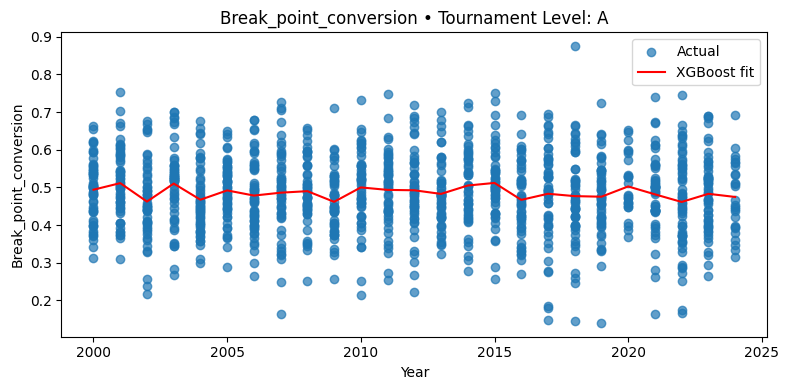


=== Tournament Level: M ===
Serve_point_won_percentage     | MAE = 0.044 | R² = -0.260


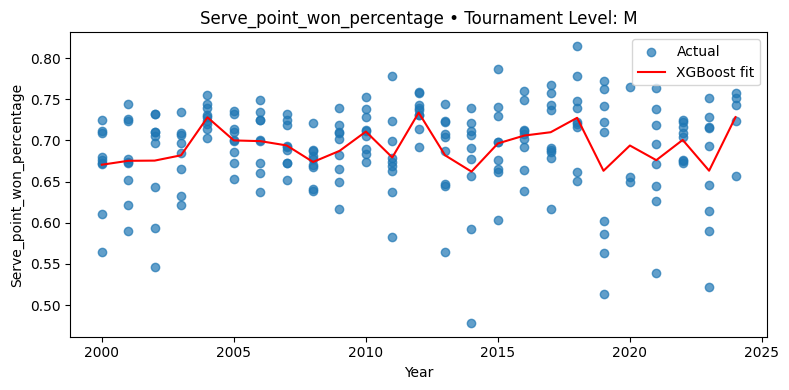

Ace_per_game                   | MAE = 0.252 | R² = -0.243


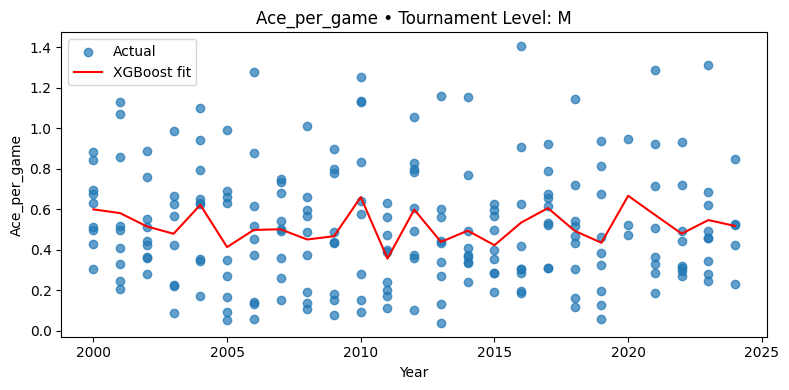

Break_point_save_percentage    | MAE = 0.129 | R² = -0.193


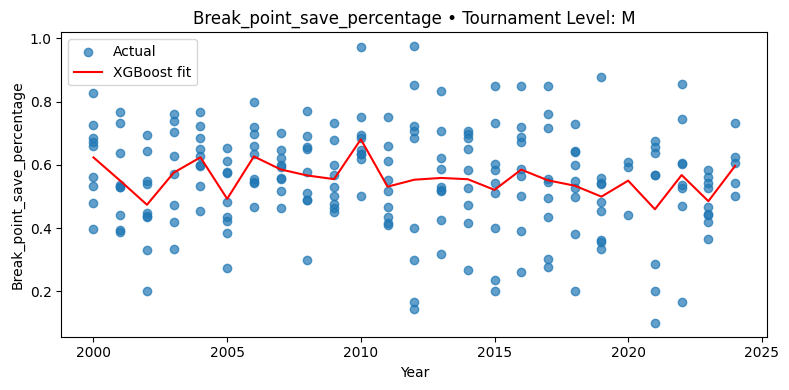

Return_point_won_percentage    | MAE = 0.059 | R² = -0.973


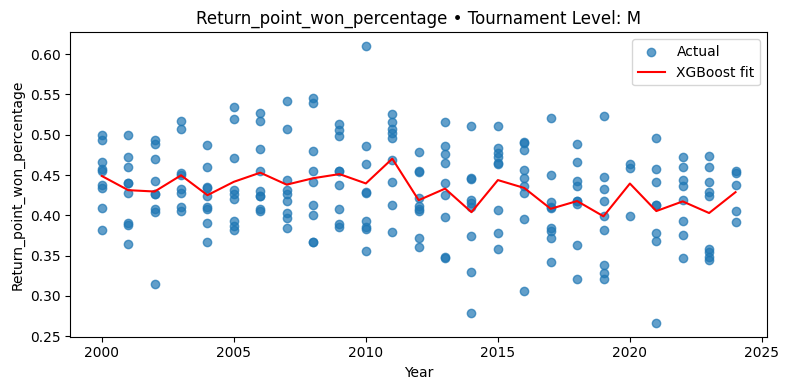

Break_point_conversion         | MAE = 0.093 | R² = -1.012


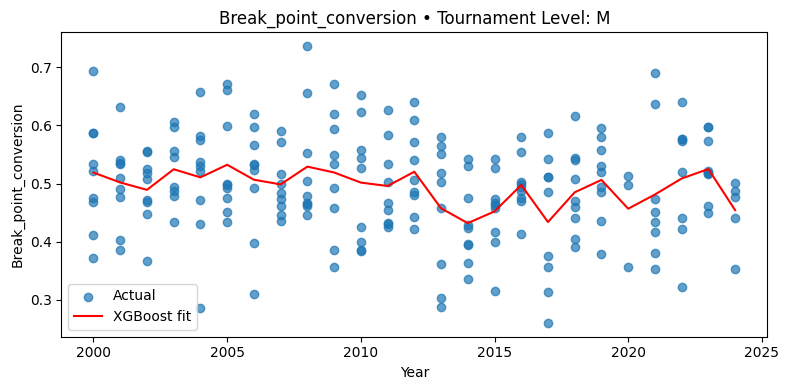


=== Tournament Level: G ===
Serve_point_won_percentage     | MAE = 0.031 | R² = -0.178


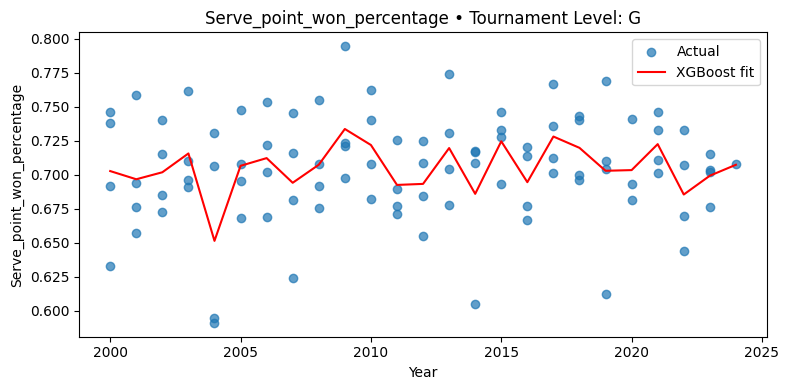

Ace_per_game                   | MAE = 0.185 | R² = -0.184


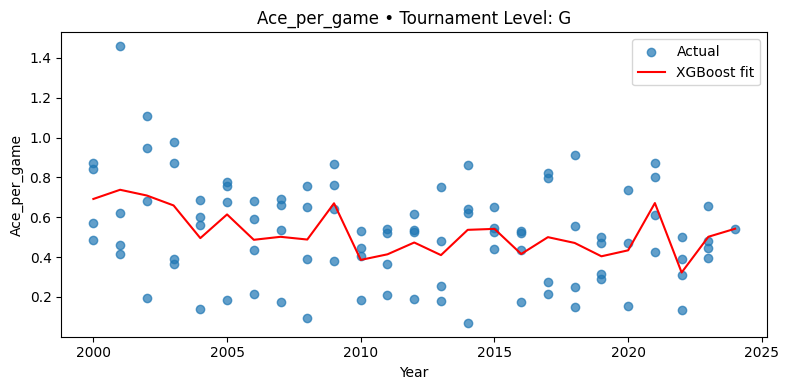

Break_point_save_percentage    | MAE = 0.106 | R² = -0.668


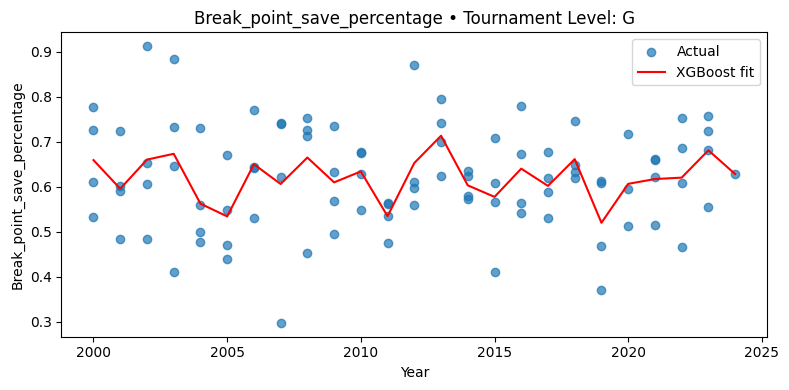

Return_point_won_percentage    | MAE = 0.038 | R² = -0.206


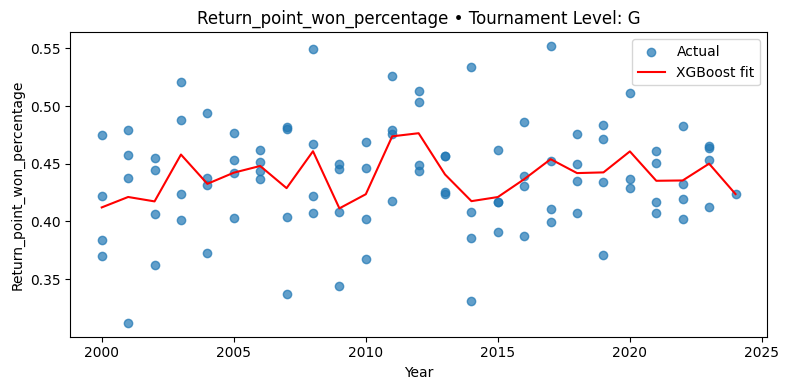

Break_point_conversion         | MAE = 0.066 | R² = -0.480


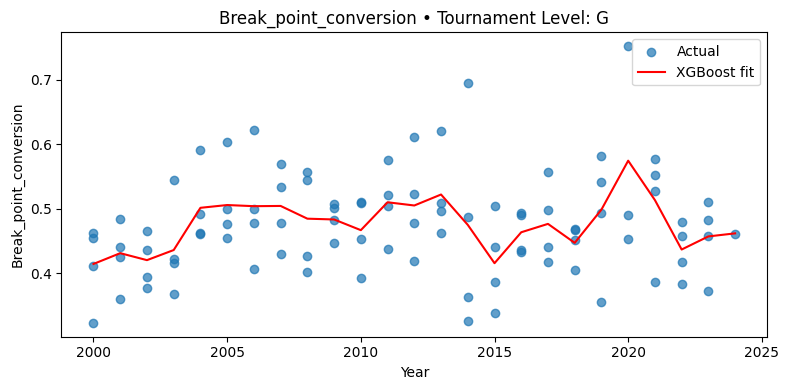


=== Tournament Level: F ===
Serve_point_won_percentage     | MAE = 0.060 | R² = -4.290


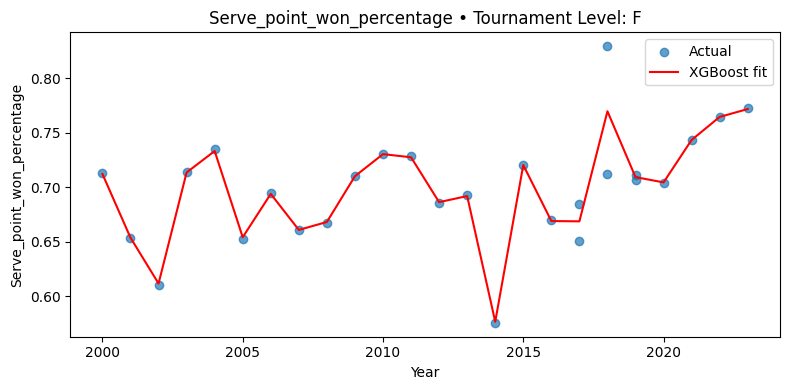

Ace_per_game                   | MAE = 0.235 | R² = -5.607


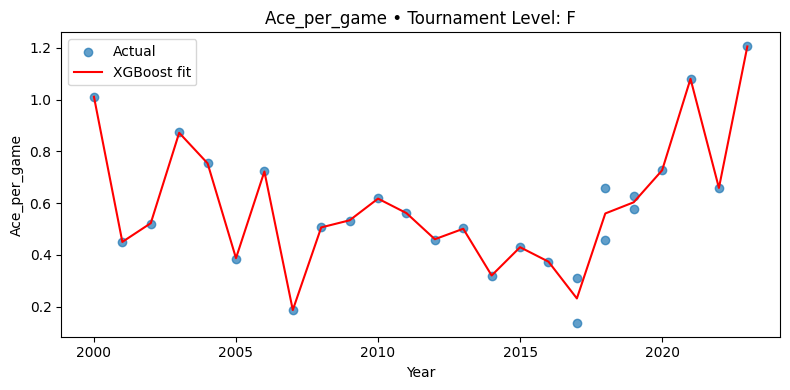

Break_point_save_percentage    | MAE = 0.213 | R² = -0.925


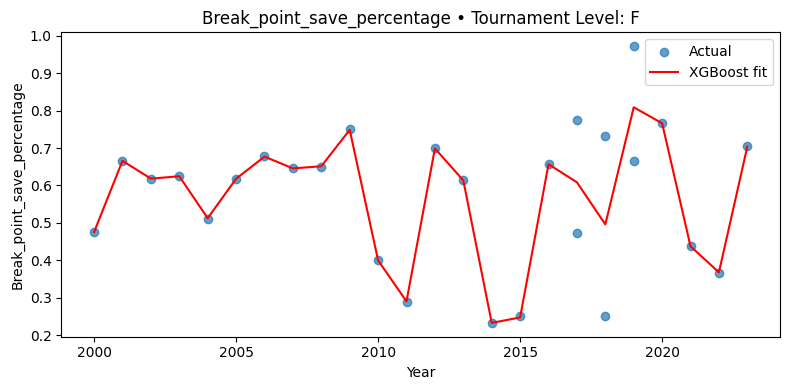

Return_point_won_percentage    | MAE = 0.038 | R² = -1.373


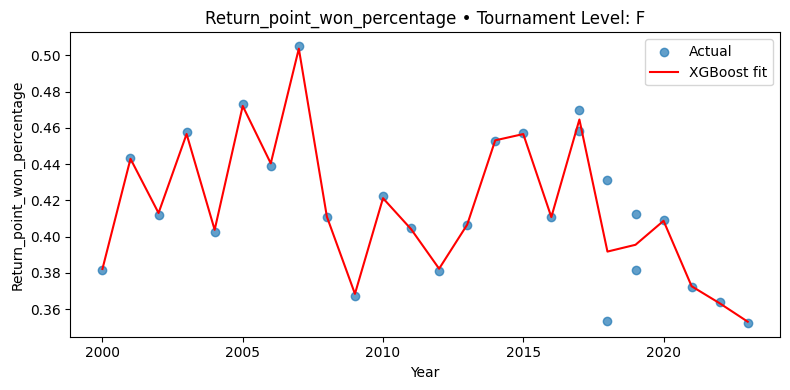

Break_point_conversion         | MAE = 0.077 | R² = -0.955


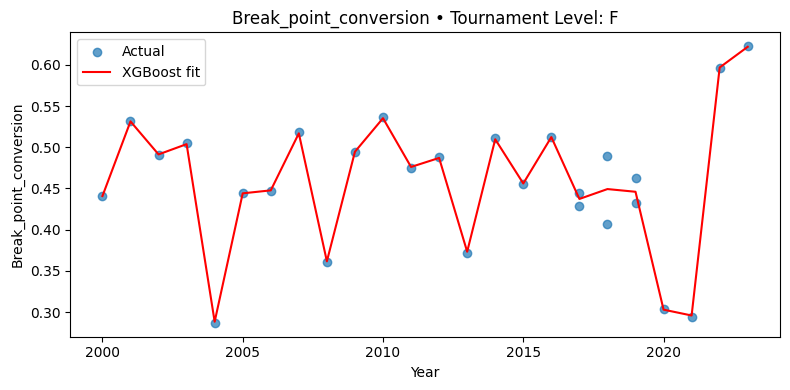

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import XGBRegressor

# CONFIG
CSV_PATH     = "updatedData.csv"
YEAR_COL     = "Year"
LEVEL_COL    = "tourney_level"
LEVELS       = ["A", "M", "G", "F"]
METRICS      = [
    "Serve_point_won_percentage",
    "Ace_per_game",
    "Break_point_save_percentage",
    "Return_point_won_percentage",
    "Break_point_conversion",
]
XGB_PARAMS = dict(
    objective="reg:squarederror",
    n_estimators=400,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
)
N_SPLITS = 5
PLOT_FITS = True

# Load data
df = pd.read_csv(CSV_PATH)

for level in LEVELS:
    df_level = df[df[LEVEL_COL] == level]
    if df_level.empty:
        print(f"[!] No data for tournament level: {level}")
        continue

    print(f"\n=== Tournament Level: {level} ===")

    for metric in METRICS:
        X = df_level[[YEAR_COL]].values
        y = df_level[metric].values

        mae_scores, r2_scores = [], []
        tscv = TimeSeriesSplit(n_splits=N_SPLITS)

        for train_idx, test_idx in tscv.split(X):
            model = XGBRegressor(**XGB_PARAMS)
            model.fit(X[train_idx], y[train_idx])
            y_pred = model.predict(X[test_idx])
            mae_scores.append(mean_absolute_error(y[test_idx], y_pred))
            r2_scores.append(r2_score(y[test_idx], y_pred))

        print(f"{metric:30} | MAE = {sum(mae_scores)/N_SPLITS:.3f} | R² = {sum(r2_scores)/N_SPLITS:.3f}")

        model_full = XGBRegressor(**XGB_PARAMS).fit(X, y)

        if PLOT_FITS:
            years_grid = pd.DataFrame({
                YEAR_COL: range(df_level[YEAR_COL].min(), df_level[YEAR_COL].max() + 1)
            })
            y_grid_pred = model_full.predict(years_grid)

            plt.figure(figsize=(8, 4))
            plt.scatter(X, y, label="Actual", alpha=0.7)
            plt.plot(years_grid, y_grid_pred, color="red", label="XGBoost fit")
            plt.title(f"{metric} • Tournament Level: {level}")
            plt.xlabel("Year")
            plt.ylabel(metric)
            plt.legend()
            plt.tight_layout()
            plt.show()
